# SC1015 SC20 Group 1 - Tiew Yen Huei, Hashil Jugjivan, Ryan Teo Cher Kean

### Our main goal of this project is to analyse the relevant numeric variables in the dataset "20 Years of NBA Draft Data" taken from Kaggle and "2021-22 NBA Player Contracts" taken from Basketball Reference.

### The "20 Years of NBA Draft Data" dataset includes information of players statistics and performance attributes while the "2021-22 NBA Player Contracts" dataset includes information of players' salaries in the year 2021-22.

##### https://www.kaggle.com/datasets/benwieland/nba-draft-data
##### https://www.basketball-reference.com/contracts/players.html

***

# The problem that we would like to explore is as follows:
 Yao Ming is currently playing for the Houston Rockets in the NBA. He has pretty good statistics based on his player performance and his contract with the Houston Rockets is about to end. He has received numerous offers from the other NBA teams to sign with them. Yao Ming is not sure whether the salaries offered are aligned to his standard as a player, hence, he is not sure which team to sign with. Marcus Paige from the Brooklyn Nets is also in the same situation.
 ***
To help both of these players out with their decision, we have taken data of the current NBA players' comprising of their statistics and their salary and intend to explore on the following:

# How does a player's performance in the NBA affect their salary?

In [1]:
# Import the necessary libraries for exploratory data analysis
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

In [2]:
#Reading necessary data files 
draftdata = pd.read_csv('draft-data-20-years.csv')
salary = pd.read_csv('salary.csv')

In [3]:
draftdata.head()

Unnamed: 0  Rk  Pk   Tm              Player       College   Yrs       G  \
0           1   1   1  BRK     Derrick Coleman      Syracuse  15.0   781.0   
1           2   2   2  OKC         Gary Payton  Oregon State  17.0  1335.0   
2           3   3   3  DEN  Mahmoud Abdul-Rauf           LSU   9.0   586.0   
3           4   4   4  ORL        Dennis Scott  Georgia Tech  10.0   629.0   
4           5   5   5  CHA        Kendall Gill      Illinois  15.0   966.0   

     TOTMP   TOTPTS  ...  WS/48  BPM  VORP  DraftYr   MPG   PPG  RPG  APG  \
0  25903.0  12884.0  ...  0.119  1.4  22.3     1990  33.2  16.5  9.3  2.5   
1  47117.0  21813.0  ...  0.148  3.3  62.5     1990  35.3  16.3  3.9  6.7   
2  15628.0   8553.0  ...  0.077 -0.8   4.5     1990  26.7  14.6  1.9  3.5   
3  17983.0   8094.0  ...  0.089  0.2   9.9     1990  28.6  12.9  2.8  2.1   
4  29481.0  12914.0  ...  0.078  0.1  15.8     1990  30.5  13.4  4.1  3.0   

                                           playerurl  DraftYear  
0  https://www.sports-reference.com/cbb/players/d...       1990  
1  https://www.sports-reference.com/cbb/players/g...       1990  
2  https://www.sports-reference.com/cbb/players/m...       1990  
3  https://www.sports-reference.com/cbb/players/d...       1990  
4  https://www.sports-reference.com/cbb/players/k...       1990  

[5 rows x 26 columns]

In [4]:
salary.head()

Rk                       Player   Tm      2021-22      2022-23  \
0   1      Stephen Curry\curryst01  GSW  $45,780,966  $48,070,014   
1   2           John Wall\walljo01  HOU  $44,310,840  $47,366,760   
2   3  Russell Westbrook\westbru01  LAL  $44,211,146  $47,063,478   
3   4       James Harden\hardeja01  PHI  $43,848,000  $46,872,000   
4   5       LeBron James\jamesle01  LAL  $41,180,544  $44,474,988   

       2023-24      2024-25      2025-26 2026-27 Signed Using    Guaranteed  
0  $51,915,615  $55,761,216  $59,606,817     NaN  Bird Rights  $261,134,628  
1          NaN          NaN          NaN     NaN  Bird Rights   $44,310,840  
2          NaN          NaN          NaN     NaN  Bird Rights   $44,211,146  
3          NaN          NaN          NaN     NaN  Bird Rights   $43,848,000  
4          NaN          NaN          NaN     NaN         Bird   $85,655,532

# Cleaning "2021-22 NBA Player Contracts" salary dataset

In [5]:
#Removing Na values from column: 2021-22 in salary dataset 
salary.dropna(subset = ["2021-22"], inplace=True)

#Removing duplicates from column: 2021-22 in salary dataset 
salary.drop_duplicates(subset ="Player",keep = False, inplace = True)

# Removing unnecessary info in player name from column: Player in salary dataset 
for i in salary['Player']:
    index = 0 
    for j in i: 
        if j == '\\':
            k = i[0:index]
            salary["Player"].replace(i , k, inplace = True)
            break
        else:
            index+=1   
            
#removing '$' sign from column: 2021-22 in salary dataset 
for i in salary['2021-22']:
    if("$" in i):
        k = i[1:]
        salary["2021-22"].replace(i , k, inplace = True)
        
    
#removing ',' from column: 2021-22 in salary dataset
for i in salary['2021-22']:
    if(',' in i):
        k = i.split(',')
        if(len(k)==3):
            salary["2021-22"].replace(i , (k[0]+k[1]+k[2]), inplace = True)
        if(len(k)==2):
            salary["2021-22"].replace(i , (k[0]+k[1]), inplace = True)  

            
#converting str to int from column: 2021-22 in salary dataset
for i in salary['2021-22']:
    k = int(i)
    salary["2021-22"].replace(i, k, inplace=True)

In [6]:
#Cleaned salary dataset
salary = salary[["Player", "2021-22"]]
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 616
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   452 non-null    object
 1   2021-22  452 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.6+ KB


In [7]:
#Combine salary dataset with NBA draft data dataset into combinedData
combinedData = pd.merge(draftdata, salary, how='left', on='Player')

#Renaming 2021-22 to Salary
combinedData.rename(columns = {"2021-22" : "Salary"}, inplace=True)

combinedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 0 to 1867
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1868 non-null   int64  
 1   Rk          1868 non-null   int64  
 2   Pk          1868 non-null   int64  
 3   Tm          1868 non-null   object 
 4   Player      1868 non-null   object 
 5   College     1533 non-null   object 
 6   Yrs         1621 non-null   float64
 7   G           1621 non-null   float64
 8   TOTMP       1621 non-null   float64
 9   TOTPTS      1621 non-null   float64
 10  TOTTRB      1621 non-null   float64
 11  TOTAST      1621 non-null   float64
 12  FG%         1616 non-null   float64
 13  3P%         1500 non-null   float64
 14  FT%         1584 non-null   float64
 15  WS          1621 non-null   float64
 16  WS/48       1620 non-null   float64
 17  BPM         1620 non-null   float64
 18  VORP        1621 non-null   float64
 19  DraftYr     1868 non-null  

# Exploratory data analysis/visualization to gather relevant insights on players' performance and salary


________________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________________

<AxesSubplot:>

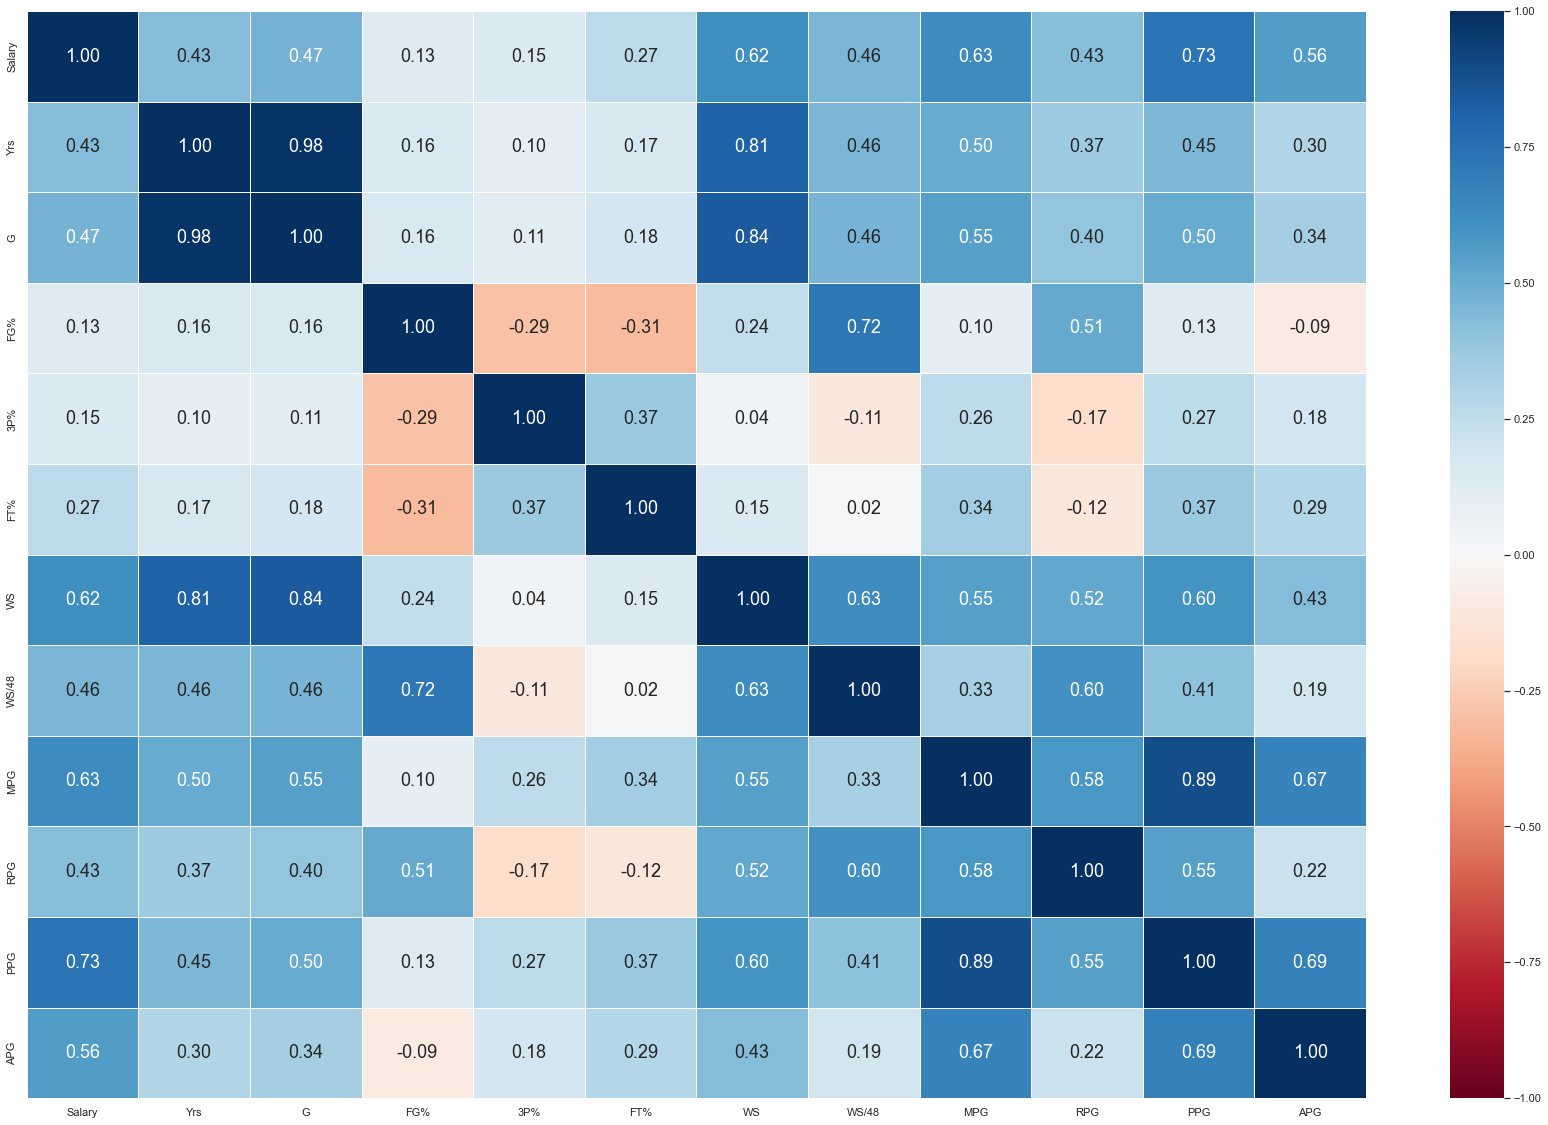

In [10]:
#Remove players without salary information from the combinedData dataframe
combinedData = combinedData.dropna(subset = ["Salary"])
combinedData.reset_index(inplace = True)

#Removing unnecessary columns like ["Rk", "Pk, "Tm", TOTMP", "TOTPTS", "TOTTRB", "TOTAST", 
#                                  "DraftYr", "DraftYear", "PlayerURL"]
combinedData = pd.DataFrame(combinedData[["Player", "Salary", "Yrs", "G", "FG%", "3P%", "FT%","WS", "WS/48","MPG", "RPG", "PPG", "APG"]])

#Dropping the rows of players with incomplete information
validSal = combinedData.dropna(subset = ["Yrs", "G", "FG%", "3P%", "FT%", "WS", "WS/48", "MPG", "RPG", "PPG", "APG"])


#Finding out the correlation between Salary and the player's performance
f = plt.figure(figsize=(30, 20))
sb.heatmap(validSal.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")


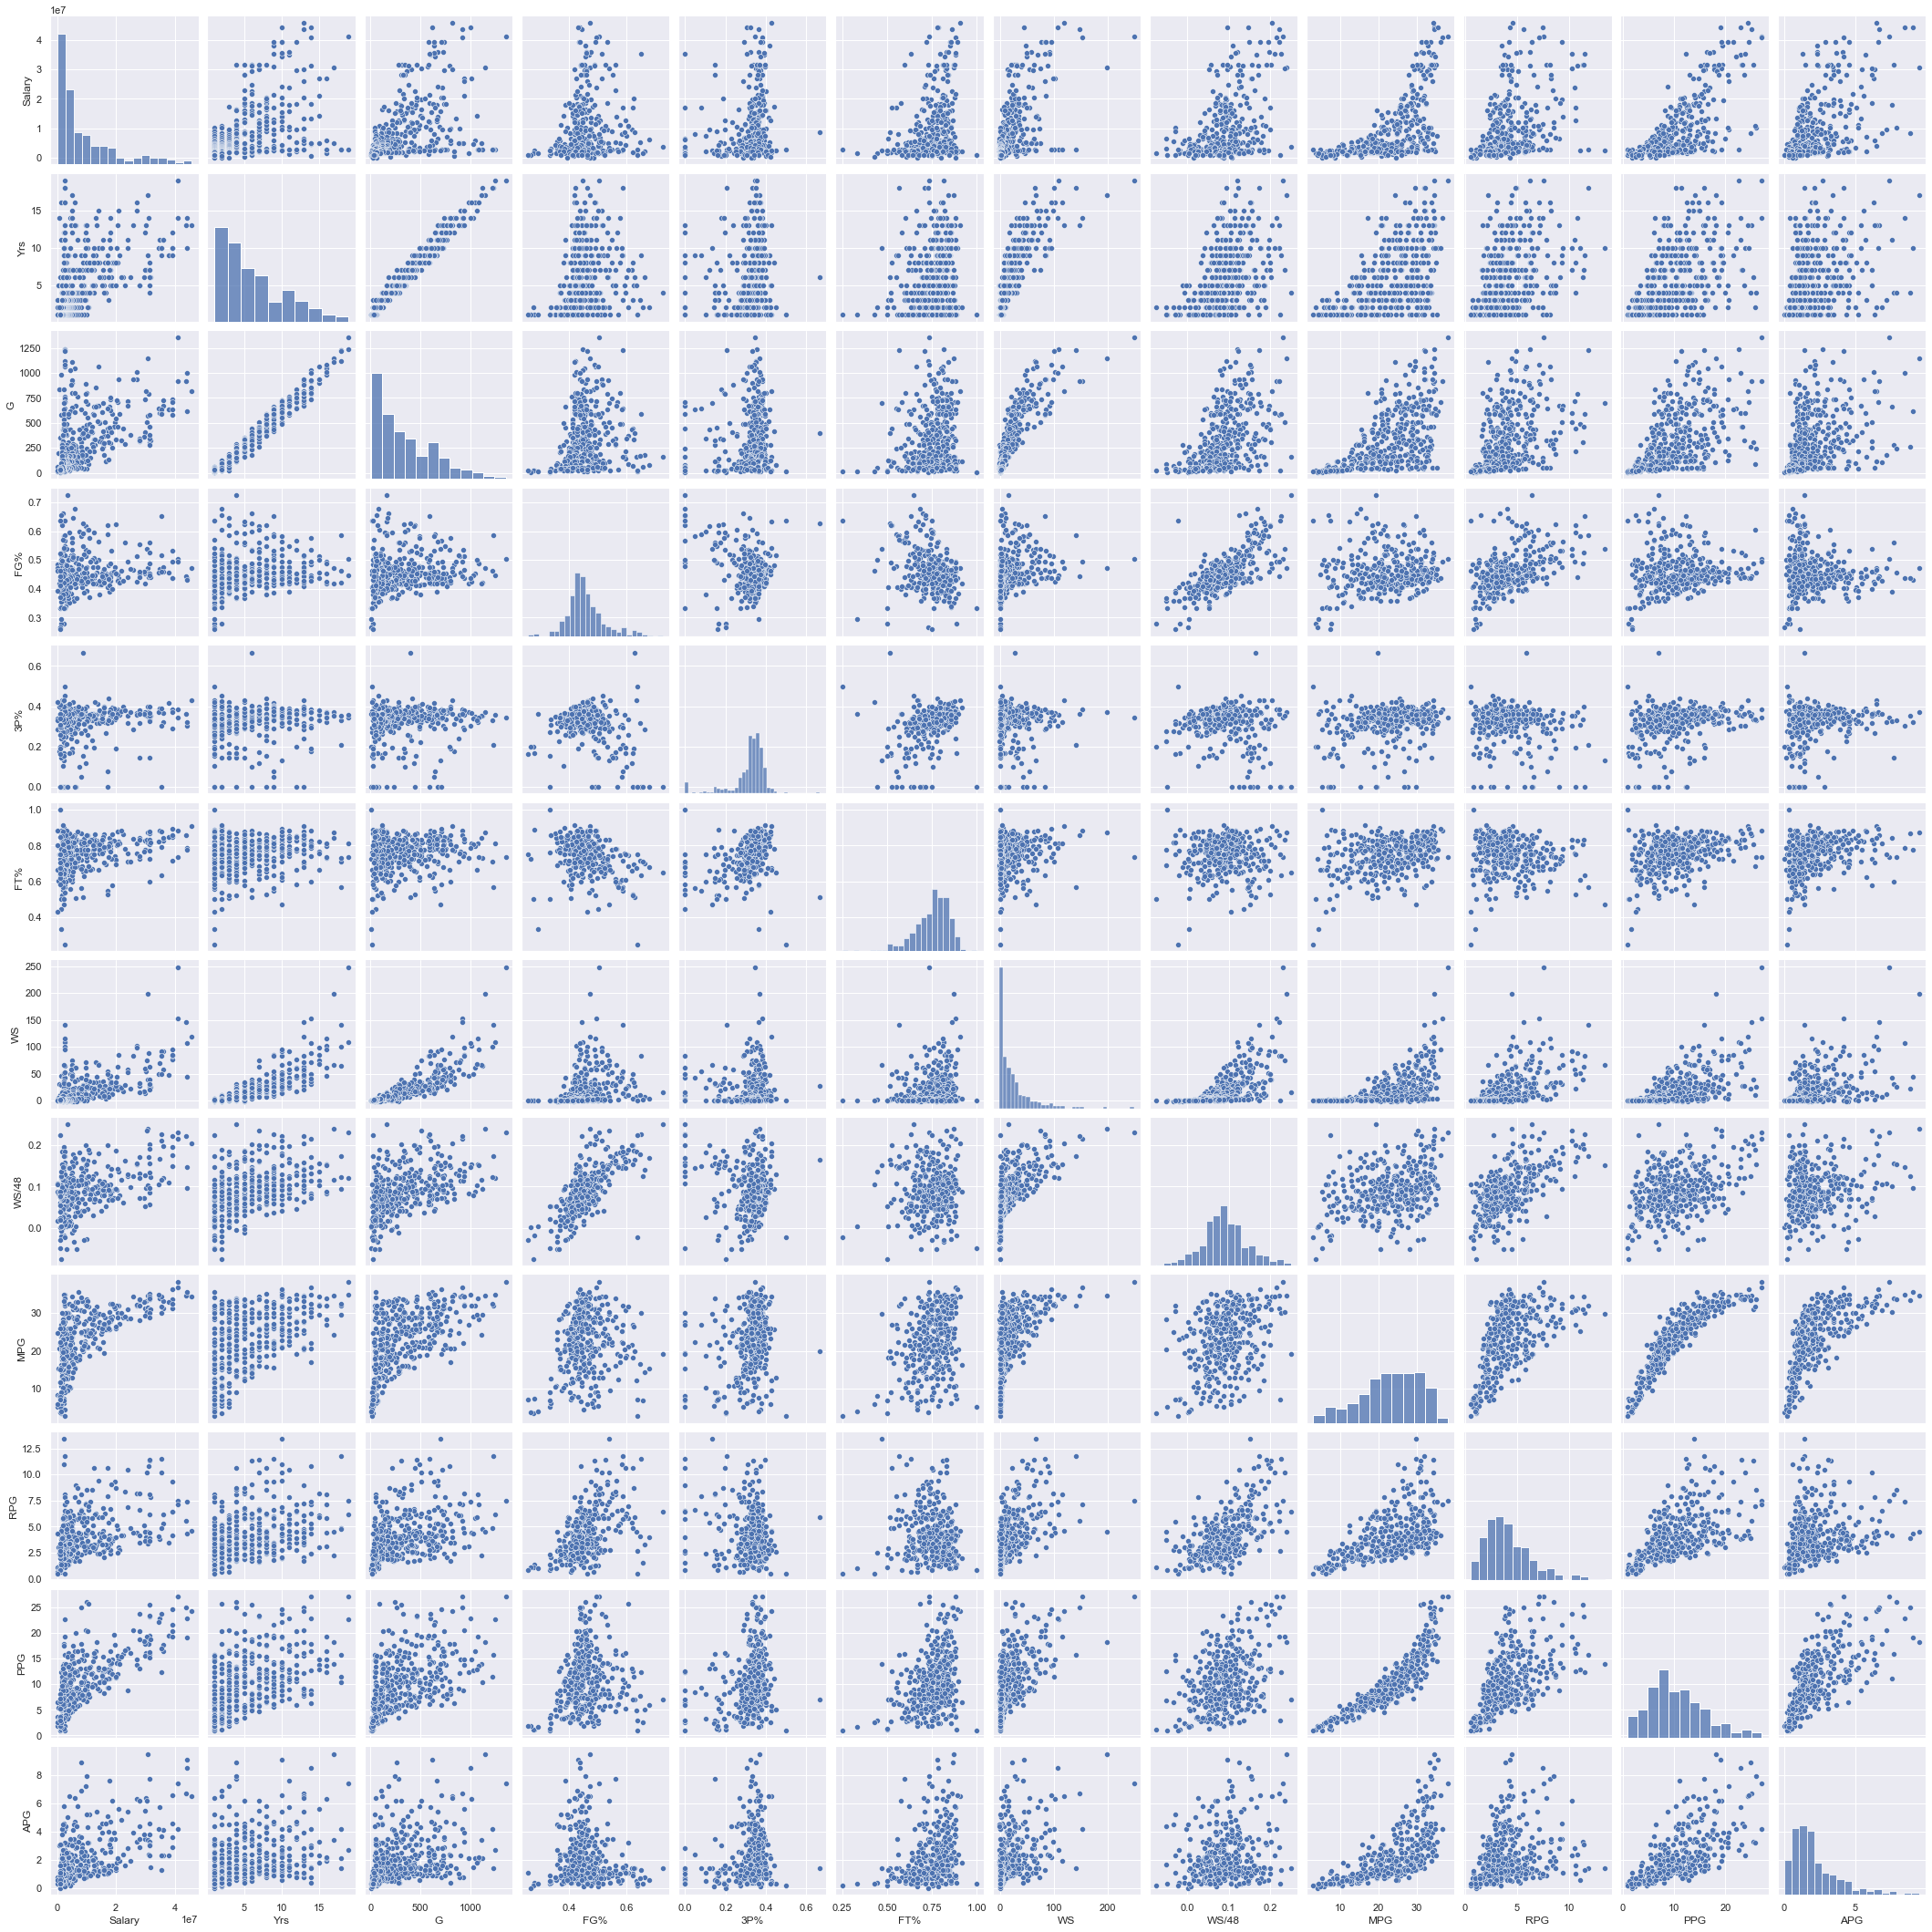

In [11]:
#Creating a variable with int64 and float64 dtypes to plot the scattergraph

plotData = validSal.select_dtypes(include = ["int64", "float64"]) 

sb.pairplot(data = plotData)

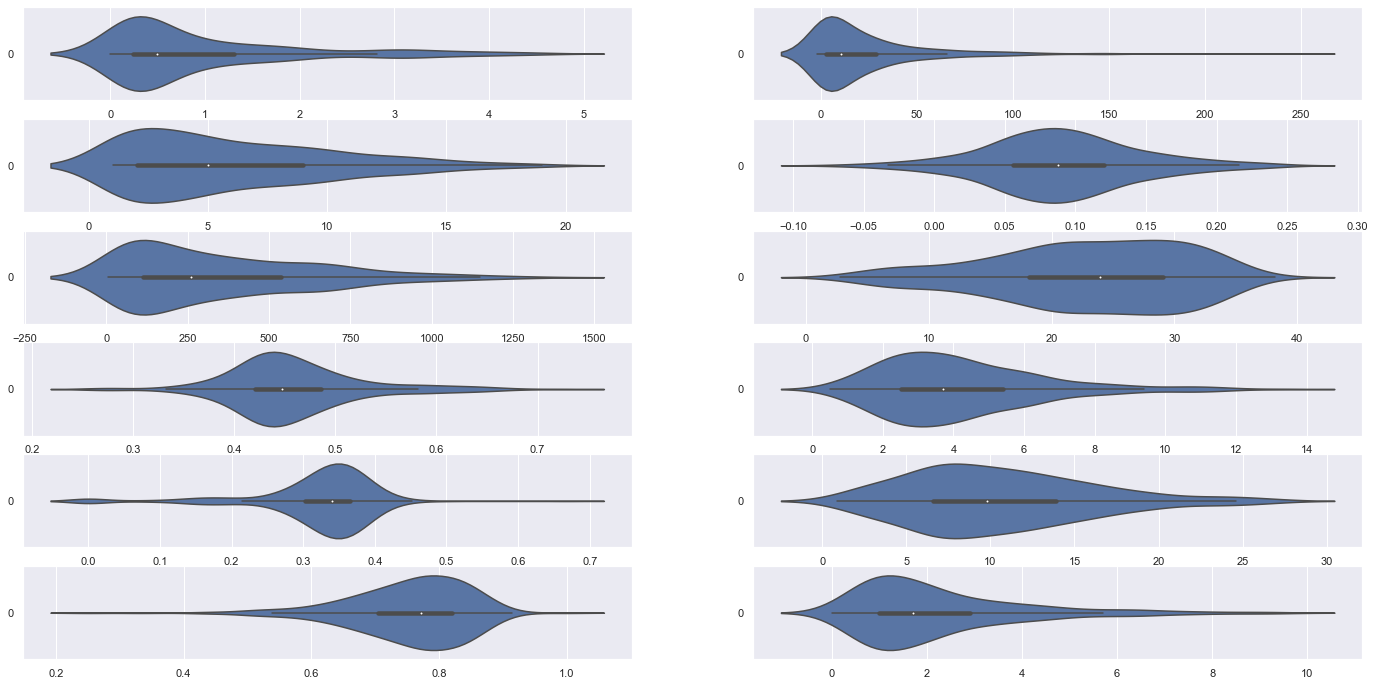

In [12]:
#Gaining insight on each individual variables, distribution, skewness, etc
f, axes = plt.subplots(6, 2, figsize=(24, 12))

countX = 0
countY = 0

for var in plotData:
    sb.violinplot(data = plotData[var], orient = "h", ax = axes[countX, countY])
    countX += 1
    if(countX == 6):
        countY+=1
        countX = 0

# Machine learning with Linear Regression model for salary prediction
### We will be doing a multi-variate linear regression for salary prediction using player performance variables with strong correlation to the salary. (eg. correlation value, r >= 0.4) 

Train Set : (260, 5) (260, 1)
Test Set  : (112, 5) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.5939269025206952
Mean Squared Error (MSE) on Train Set 	: 45938194895953.984
Mean Squared Error (MSE) on Test Set 	: 38163666352731.375


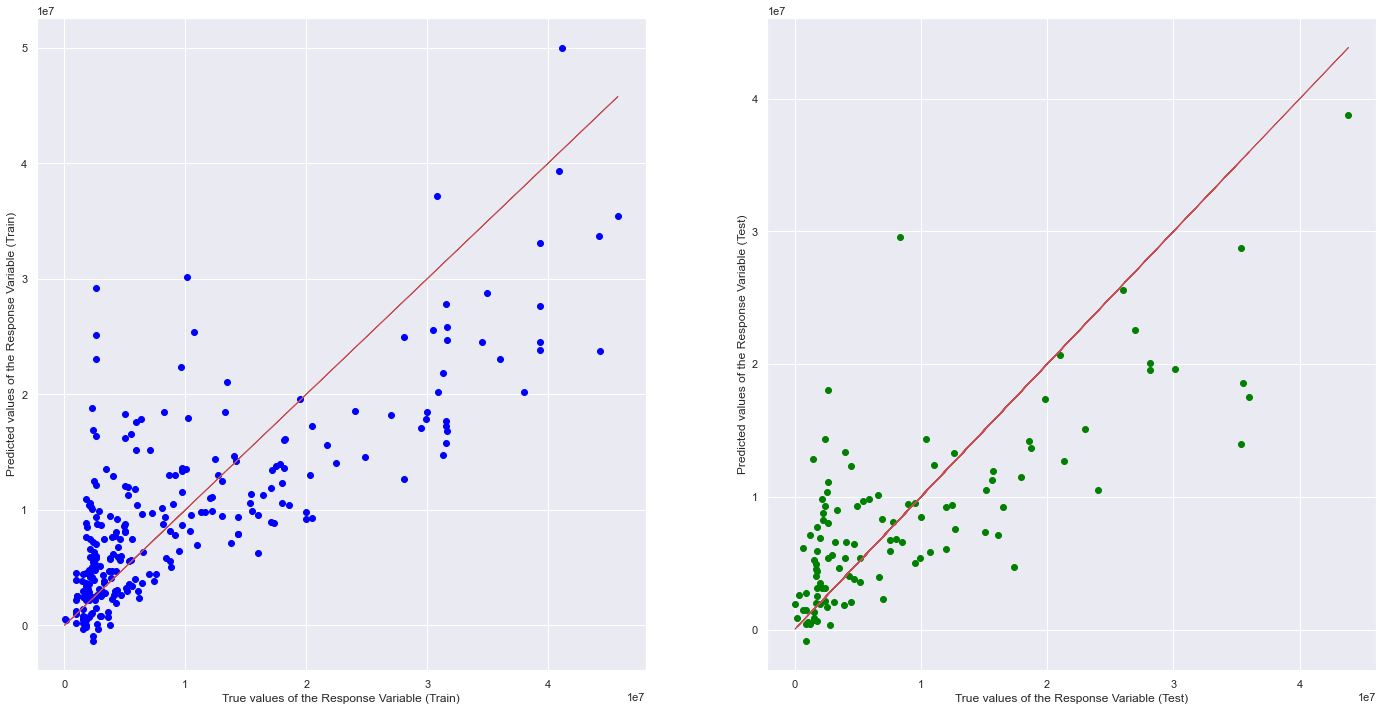

In [15]:
#Doing  multi-variate linear regression for the selected variables

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(validSal['Salary'])
X = pd.DataFrame(validSal[['WS','MPG','RPG', 'PPG', 'APG']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

# Predict Salary values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
print("\nExplained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### What if we removed the outliers, does the R^2 and MSE improve?

<AxesSubplot:>

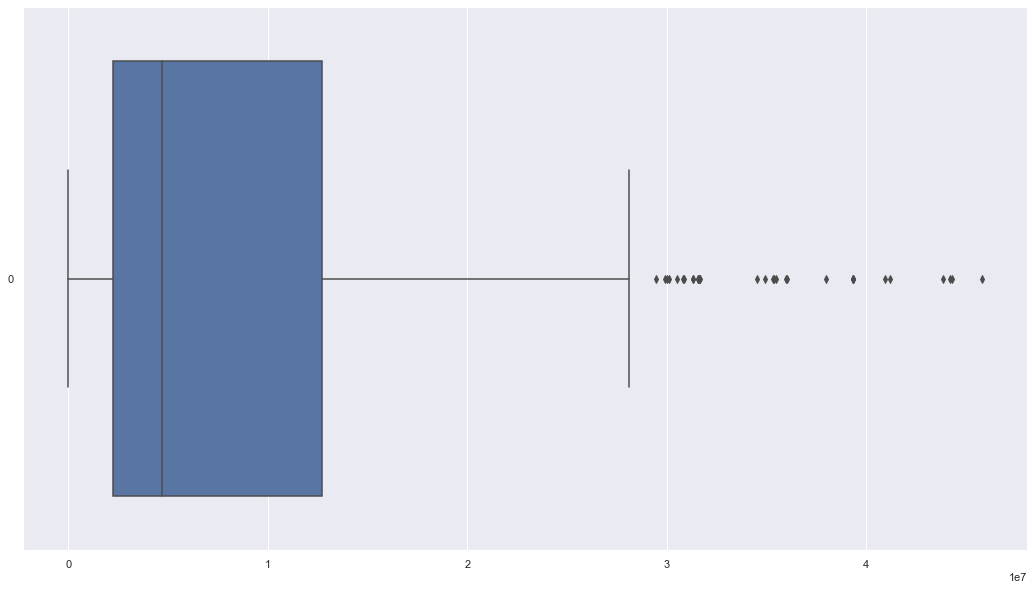

In [16]:
#Boxplot to see salary outliers from the combinedData
f, axes = plt.subplots(1, 1, figsize=(18, 10))
sb.boxplot(data = combinedData['Salary'], orient = "h")

In [17]:
#Looking for outliers in salary and removing them

#Calculating the IQR and the values for the lower whiskers and upper whiskers
q3 = combinedData['Salary'].quantile(q = 0.75)
q1 = combinedData['Salary'].quantile(q = 0.25)
iqr = q3 - q1
uWhiskers = q3 + iqr*1.5
lWhiskers = q1 - iqr*1.5     

#Removing the outliers and keeping the salary data without outliers into a new variable salXoutliers
salXoutliers = combinedData[(combinedData['Salary'] > lWhiskers) & (combinedData['Salary'] < uWhiskers)]
salXoutliers = salXoutliers[['Player', 'Salary','WS','MPG','RPG', 'PPG', 'APG']]
salXoutliers.dropna(subset = ['WS'], inplace=True)
salXoutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 378
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  344 non-null    object 
 1   Salary  344 non-null    float64
 2   WS      344 non-null    float64
 3   MPG     344 non-null    float64
 4   RPG     344 non-null    float64
 5   PPG     344 non-null    float64
 6   APG     344 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.5+ KB


Train Set : (240, 5) (240, 1)
Test Set  : (104, 5) (104, 1)

Explained Variance (R^2) on Train Set 	: 0.34613341034404355
Mean Squared Error (MSE) on Train Set 	: 26486102816659.914
Mean Squared Error (MSE) on Test Set 	: 26165813486461.75


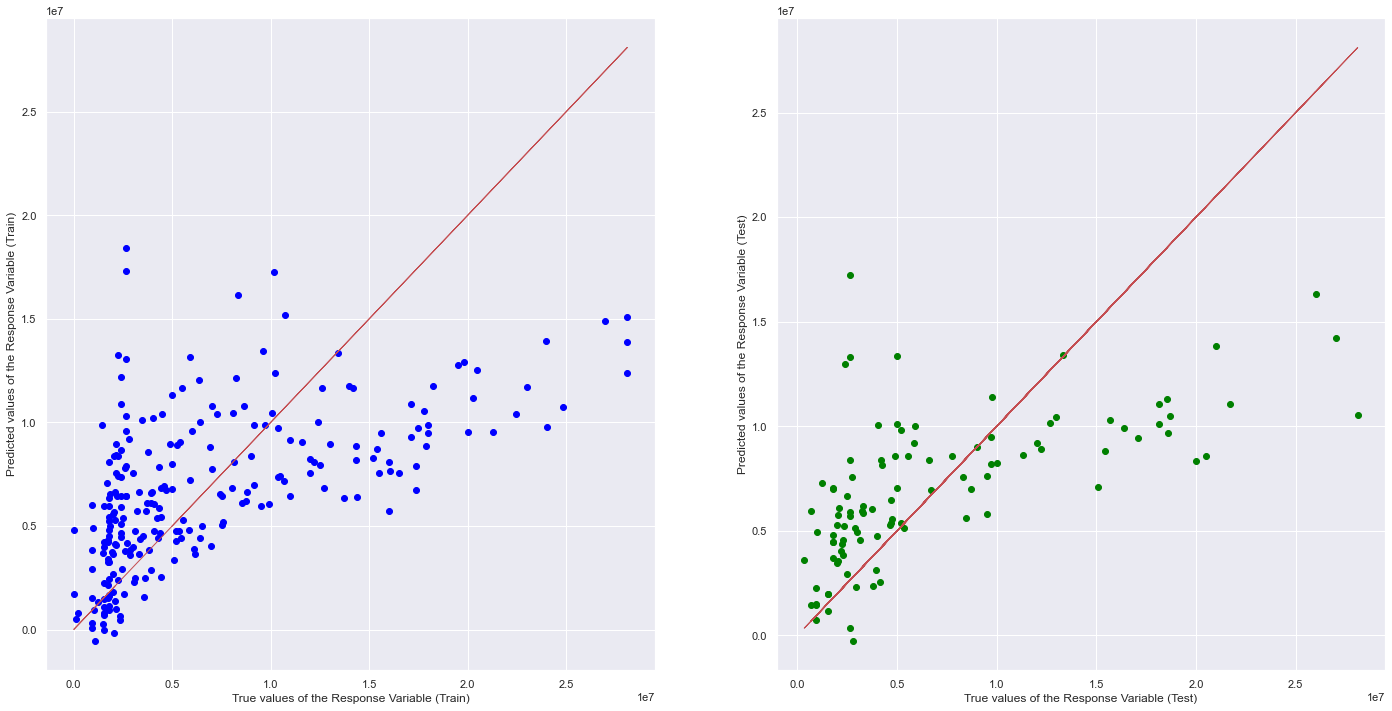

In [18]:
#Doing  multi-variate linear regression for the selected variables without salary outliers

# Extract Response and Predictors
y_sXo = pd.DataFrame(salXoutliers['Salary'])
X_sXo = pd.DataFrame(salXoutliers[['WS', 'MPG','RPG','PPG', 'APG']])

# Split the Dataset into random Train and Test
X_train_sXo, X_test_sXo, y_train_sXo, y_test_sXo = train_test_split(X_sXo, y_sXo, test_size = 0.3)

# Check the sample sizes
print("Train Set :", X_train_sXo.shape, y_train_sXo.shape)
print("Test Set  :", X_test_sXo.shape, y_test_sXo.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train_sXo, y_train_sXo)

# Predict Salary values corresponding to Predictors
y_train_pred = linreg.predict(X_train_sXo)
y_test_pred = linreg.predict(X_test_sXo)

print("\nExplained Variance (R^2) on Train Set \t:", linreg.score(X_train_sXo, y_train_sXo))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train_sXo, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test_sXo, y_test_pred))

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_sXo, y_train_pred, color = "blue")
axes[0].plot(y_train_sXo, y_train_sXo, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_sXo, y_test_pred, color = "green")
axes[1].plot(y_test_sXo, y_test_sXo, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### Turns out removing outliers worsens the R^2 and MSE for the linear regression model

We will not be using the data with outliers removed for subsequent models

_______________________________________________________________________________________________________________________________

# Why use a Ridge regression model?

 Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated. Hence, we are trying to see if it is able perform better than a simple linear regression model.

Explained Variance (R^2) on Train Set 	: 0.5939268253801748
Mean Squared Error (MSE) on Train Set 	: 45938203622698.71
Mean Squared Error (MSE) on Test Set 	: 38159178570149.15


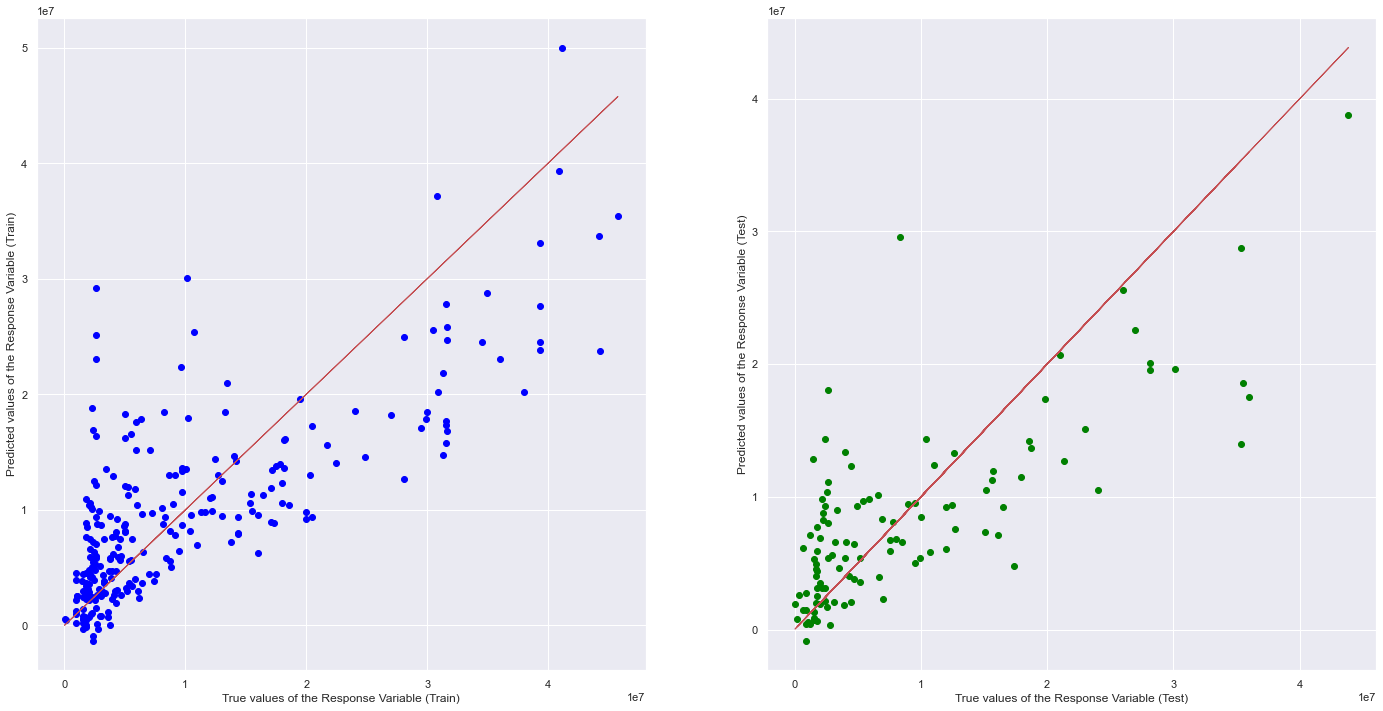

In [19]:
#Doing Ridge Regression on the selected variables
from sklearn.linear_model import Ridge

# Create a Ridge Regression object
ridge = Ridge()

# Train the Ridge Regression model
ridge.fit(X_train, y_train)

# Predict Salary values corresponding to Predictors
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print("Explained Variance (R^2) on Train Set \t:", ridge.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Why use a Lasso regression model?

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. Thus, it is capable removing variables that are not useful for predicting salary and potentially result in a better performance than a simple linear regression.

Explained Variance (R^2) on Train Set 	: 0.5939269025206856
Mean Squared Error (MSE) on Train Set 	: 45938194895955.08
Mean Squared Error (MSE) on Test Set 	: 38163664203385.69


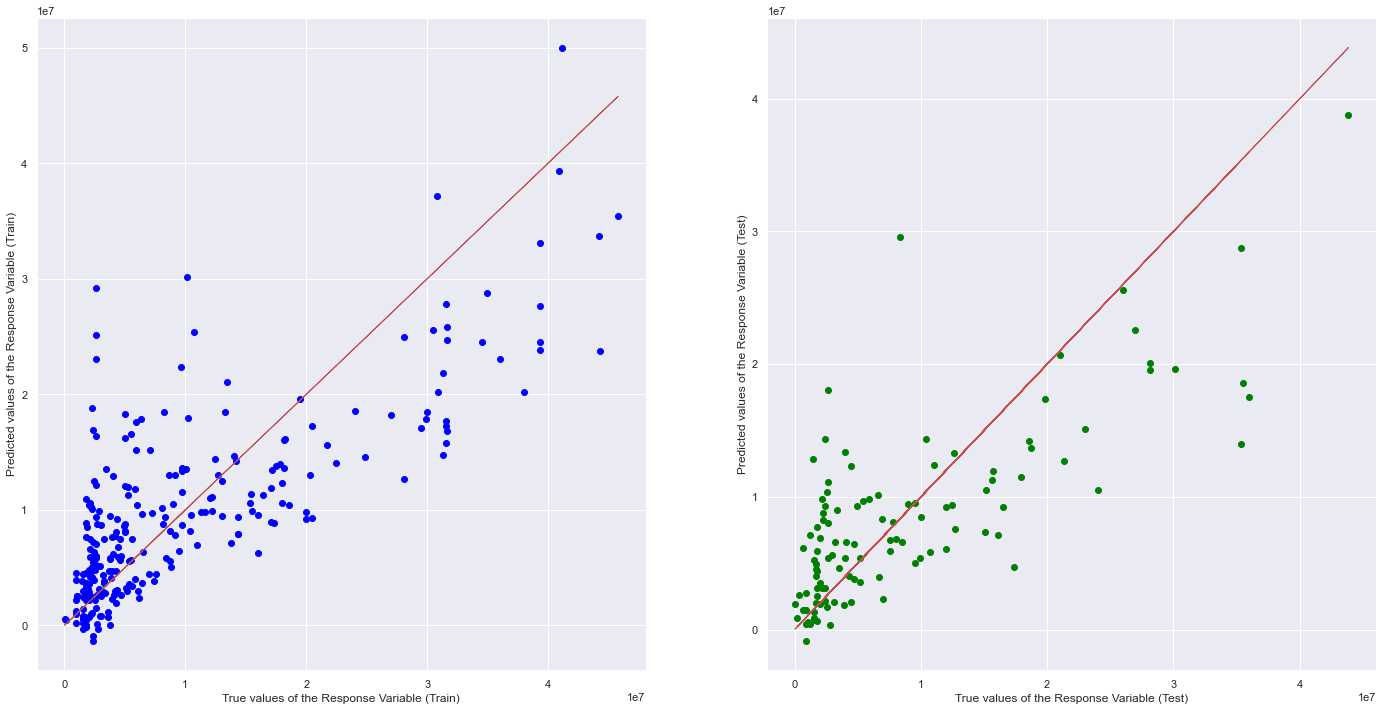

In [20]:
#Doing lasso regression on the selected variables
from sklearn import linear_model

# Create a Lasso Regression object
lasso = linear_model.Lasso()

# Train the Ridge Regression model
lasso.fit(X_train, y_train)

# Predict Salary values corresponding to Predictors
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Explained Variance (R^2) on Train Set \t:", lasso.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Yrs
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.17218416802980485
Mean Squared Error (MSE) on Train Set 	: 85136291351179.66
Mean Squared Error (MSE) on Test Set 	: 90673967894741.53


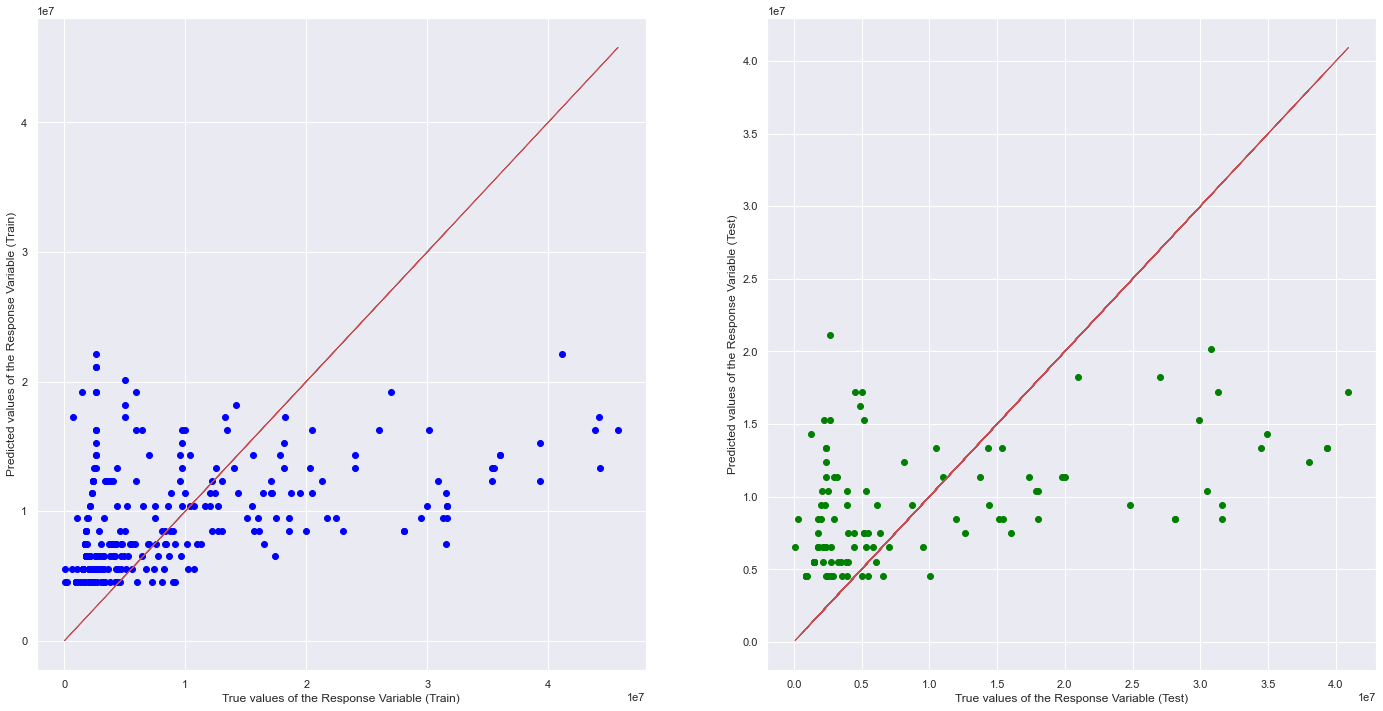

G
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.23433998327965555
Mean Squared Error (MSE) on Train Set 	: 79135992722947.56
Mean Squared Error (MSE) on Test Set 	: 92891602688673.48


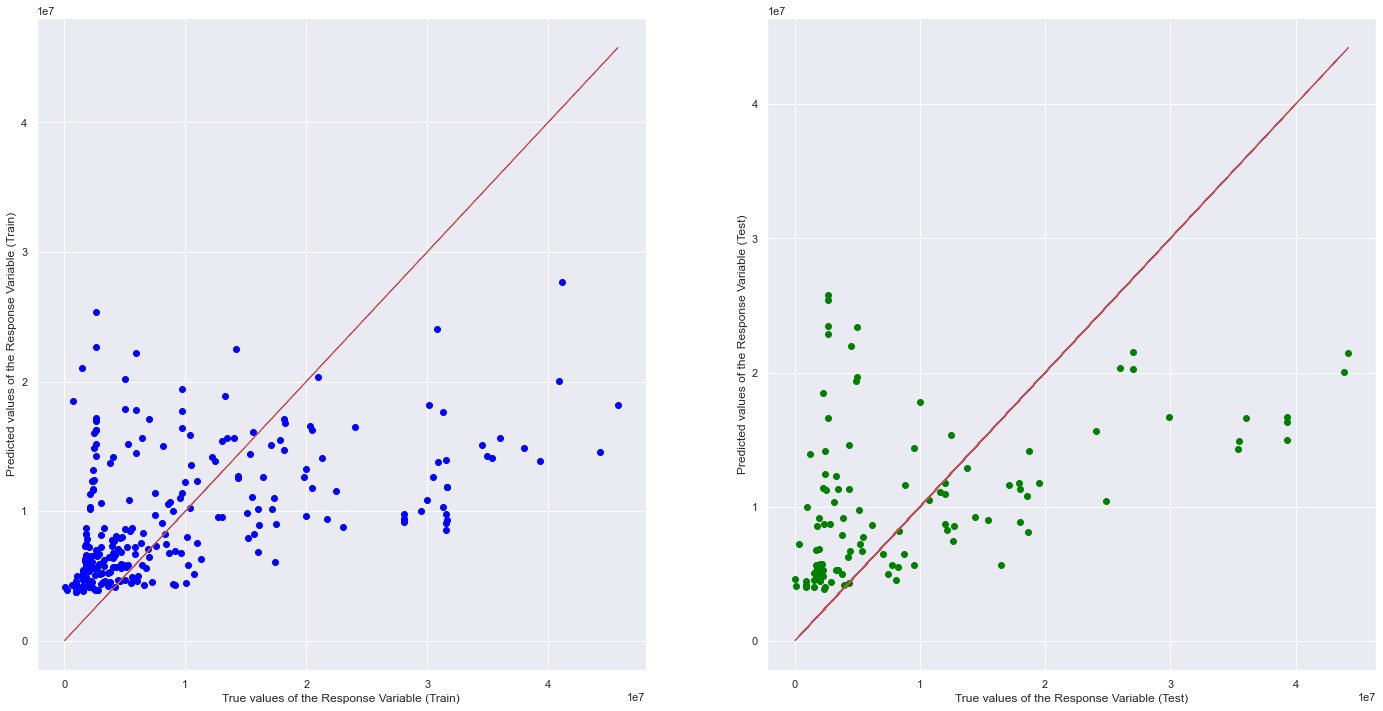

FG%
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.023498942185877336
Mean Squared Error (MSE) on Train Set 	: 97176880611773.67
Mean Squared Error (MSE) on Test Set 	: 123492985403655.48


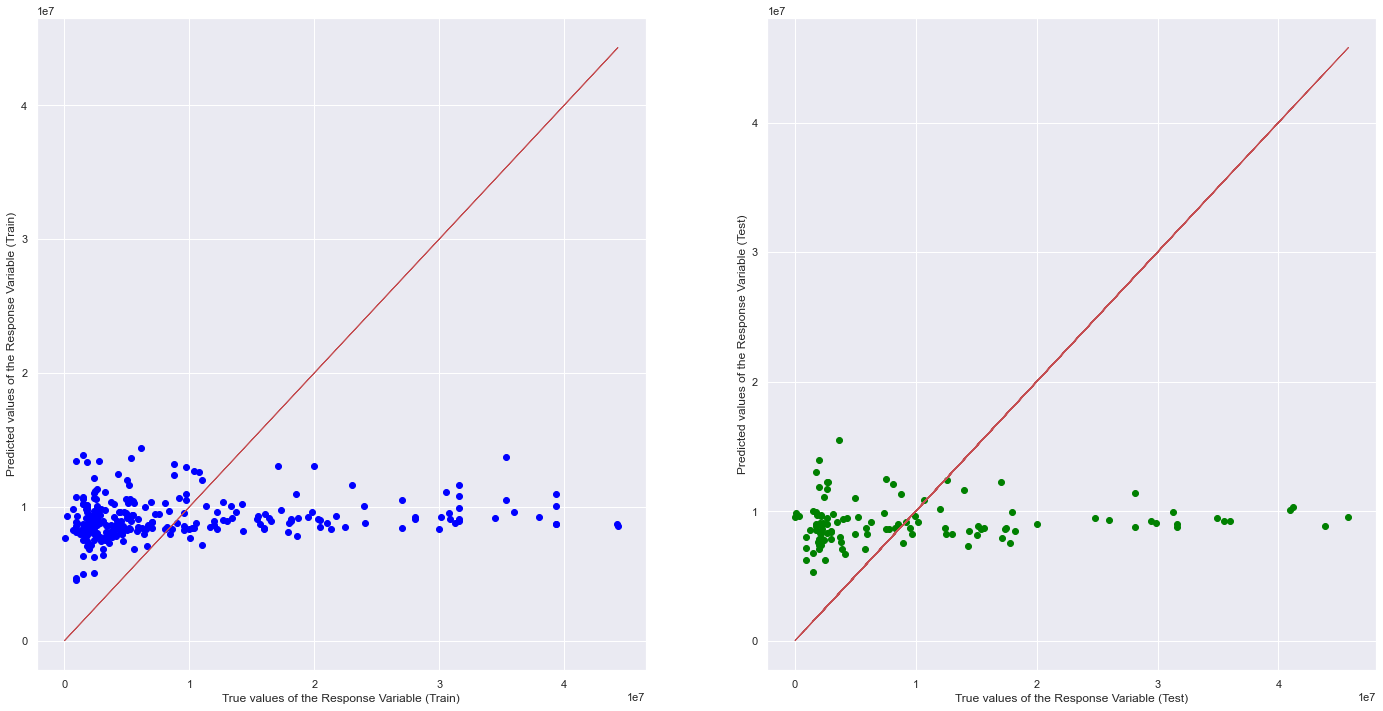

3P%
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.021306232323517138
Mean Squared Error (MSE) on Train Set 	: 106113664045337.23
Mean Squared Error (MSE) on Test Set 	: 99968060324745.03


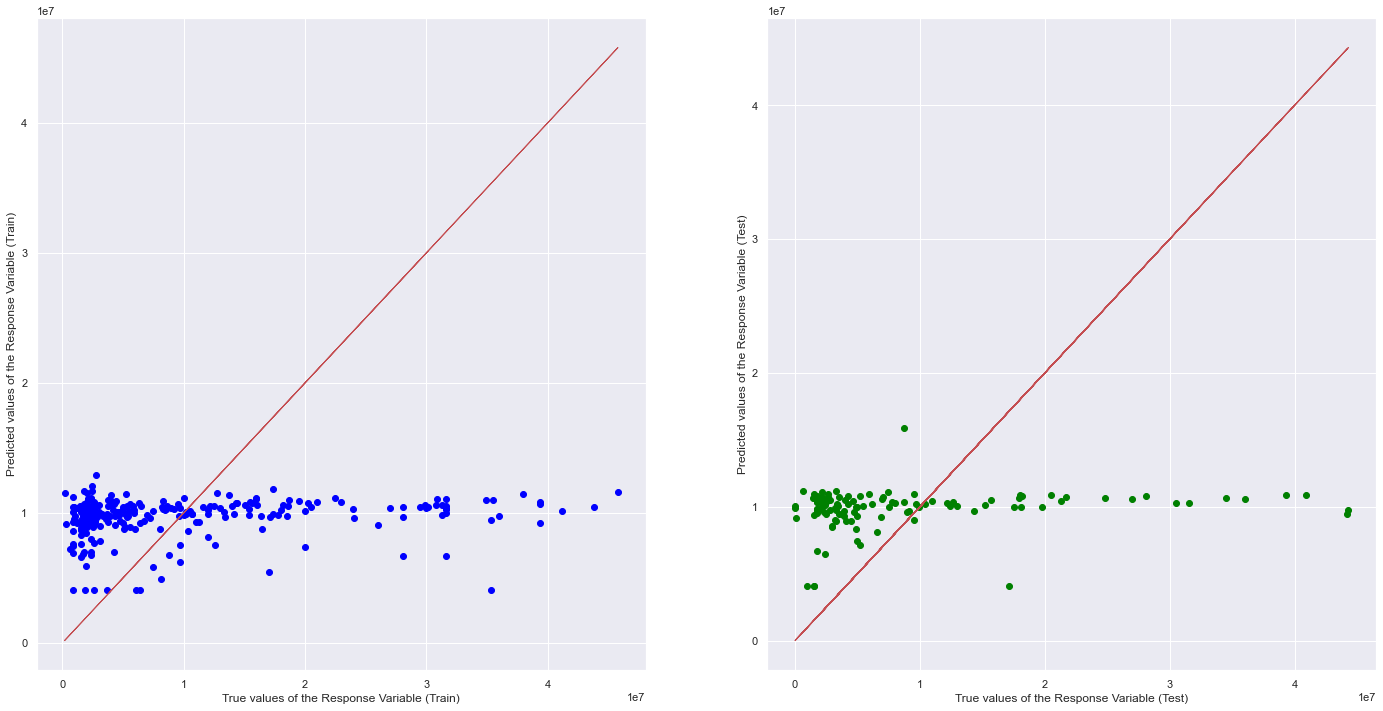

FT%
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.06069371168190929
Mean Squared Error (MSE) on Train Set 	: 87493501155868.52
Mean Squared Error (MSE) on Test Set 	: 127810323215206.6


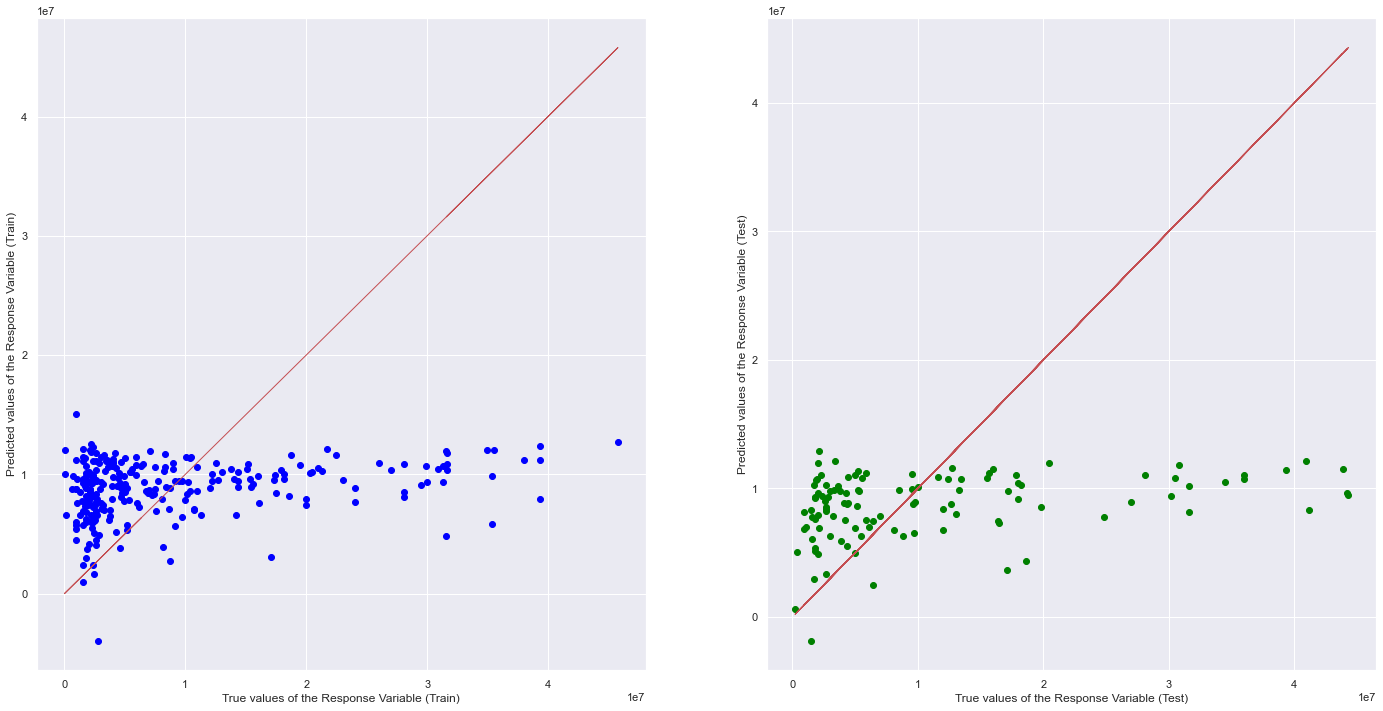

WS
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.34939873834943547
Mean Squared Error (MSE) on Train Set 	: 67820443717080.02
Mean Squared Error (MSE) on Test Set 	: 62641005141861.2


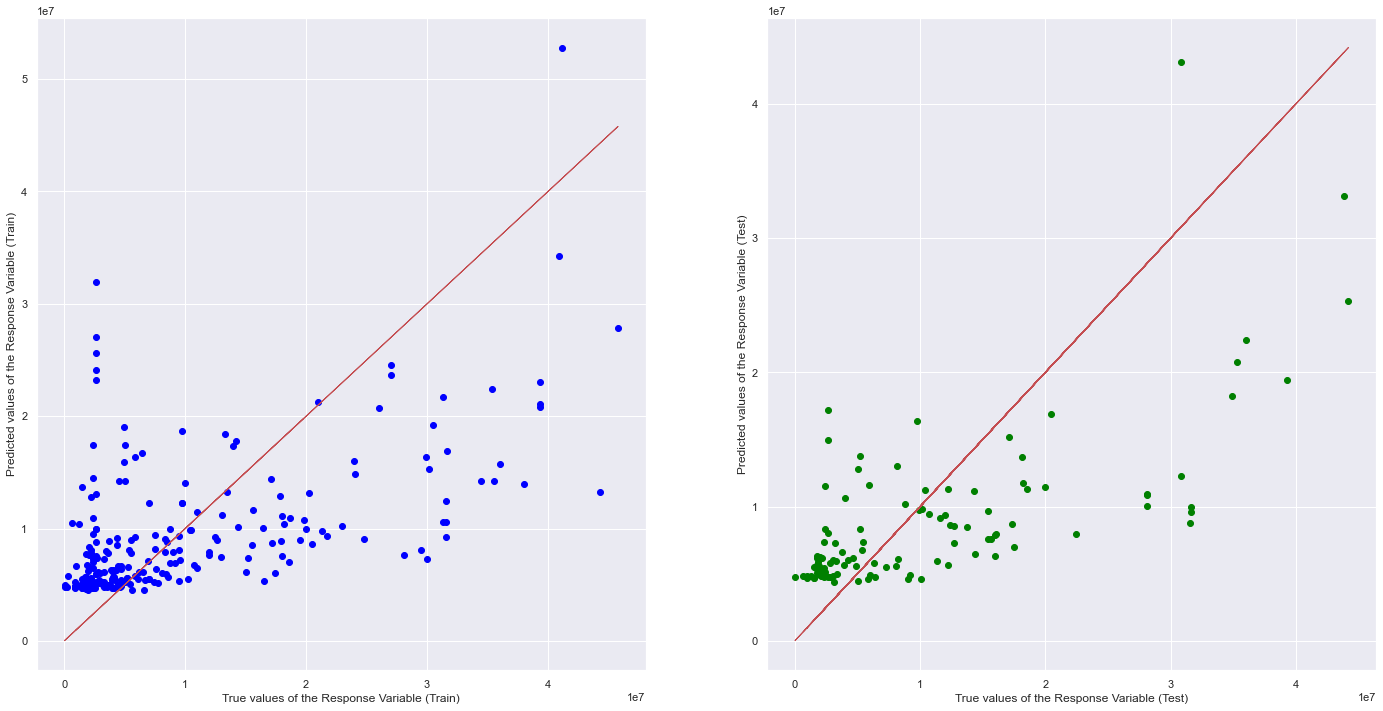

WS/48
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.18461553093811411
Mean Squared Error (MSE) on Train Set 	: 86540967504636.06
Mean Squared Error (MSE) on Test Set 	: 79408629502460.08


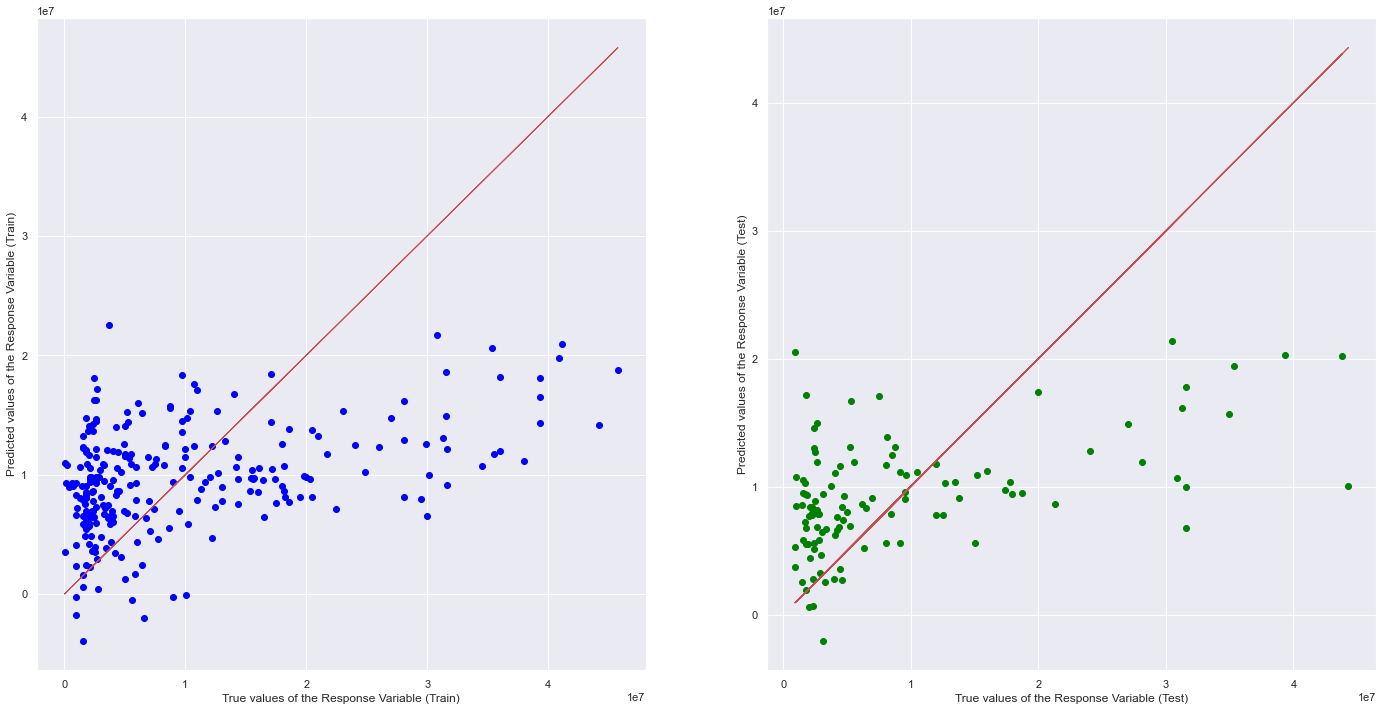

MPG
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.36477857933080204
Mean Squared Error (MSE) on Train Set 	: 63270529814903.57
Mean Squared Error (MSE) on Test Set 	: 68999047762186.64


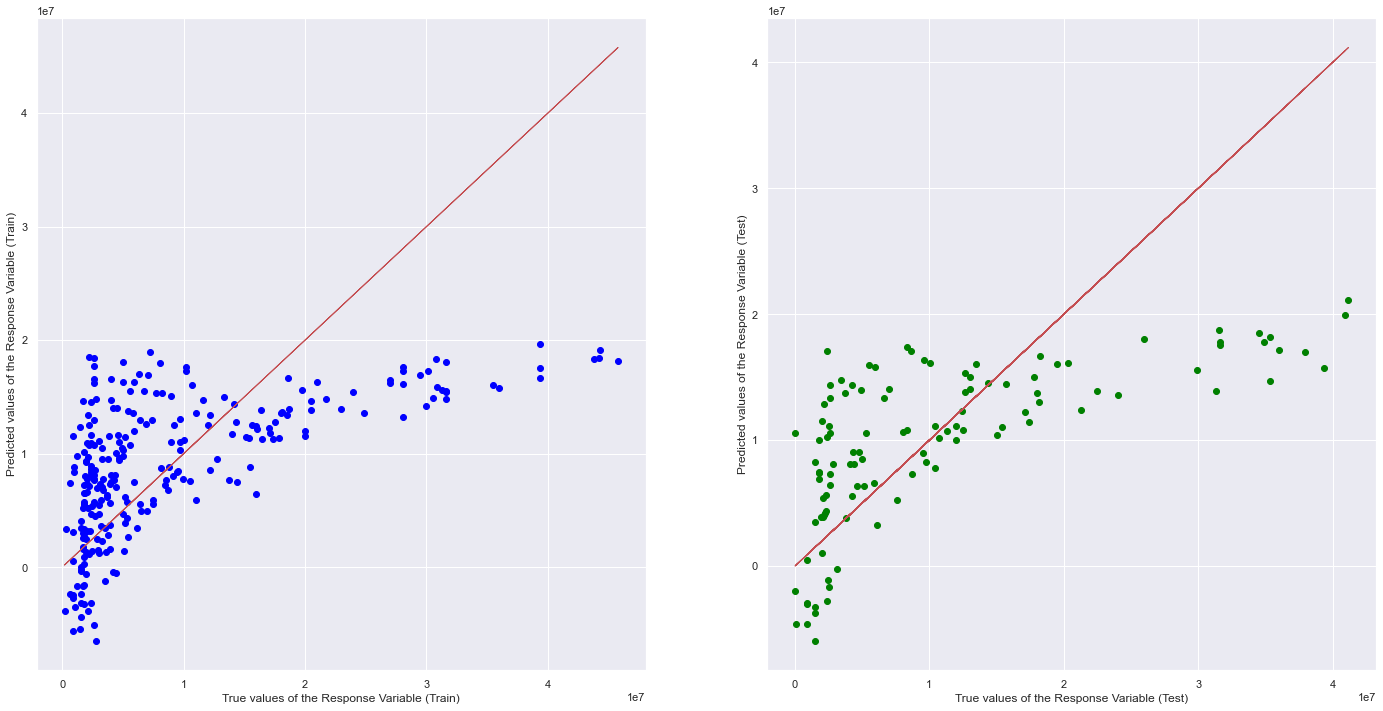

RPG
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.17542318568615223
Mean Squared Error (MSE) on Train Set 	: 88361167259456.39
Mean Squared Error (MSE) on Test Set 	: 85675657607573.84


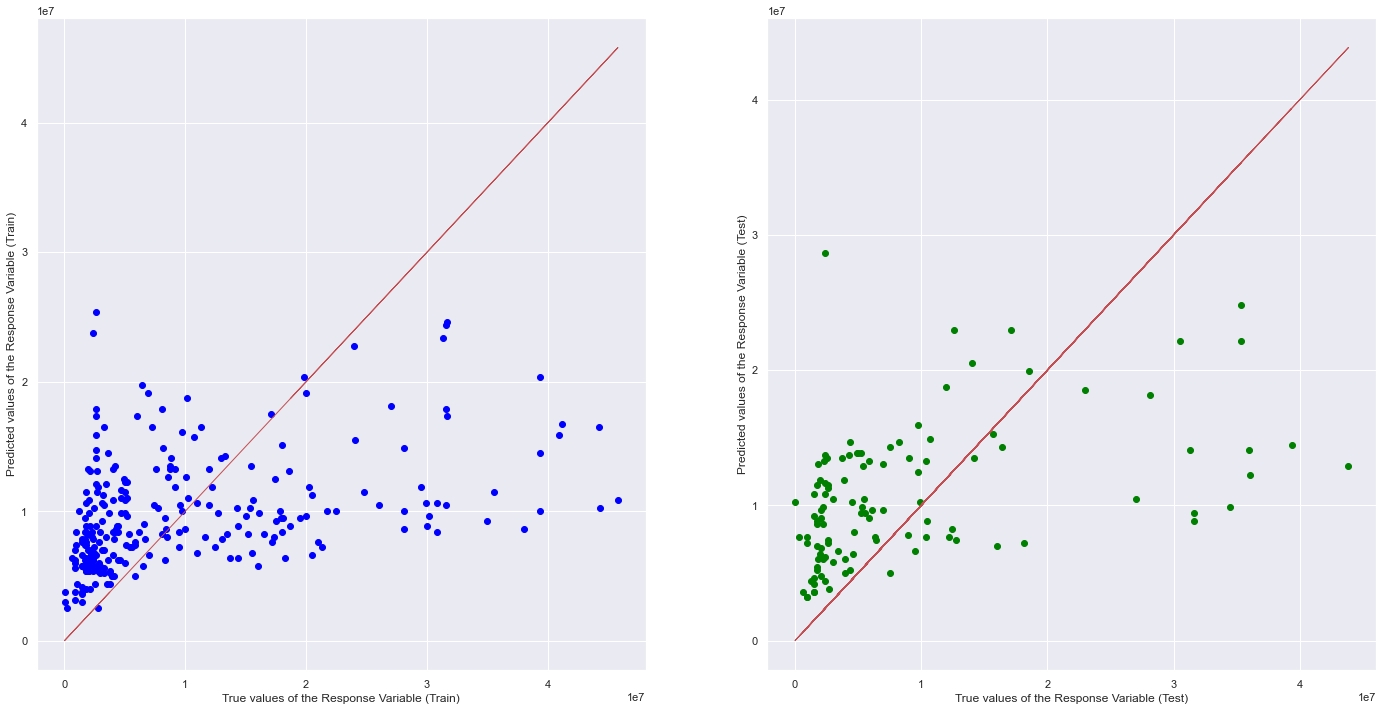

PPG
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.55471797032143
Mean Squared Error (MSE) on Train Set 	: 50663053599778.69
Mean Squared Error (MSE) on Test Set 	: 51086306392202.14


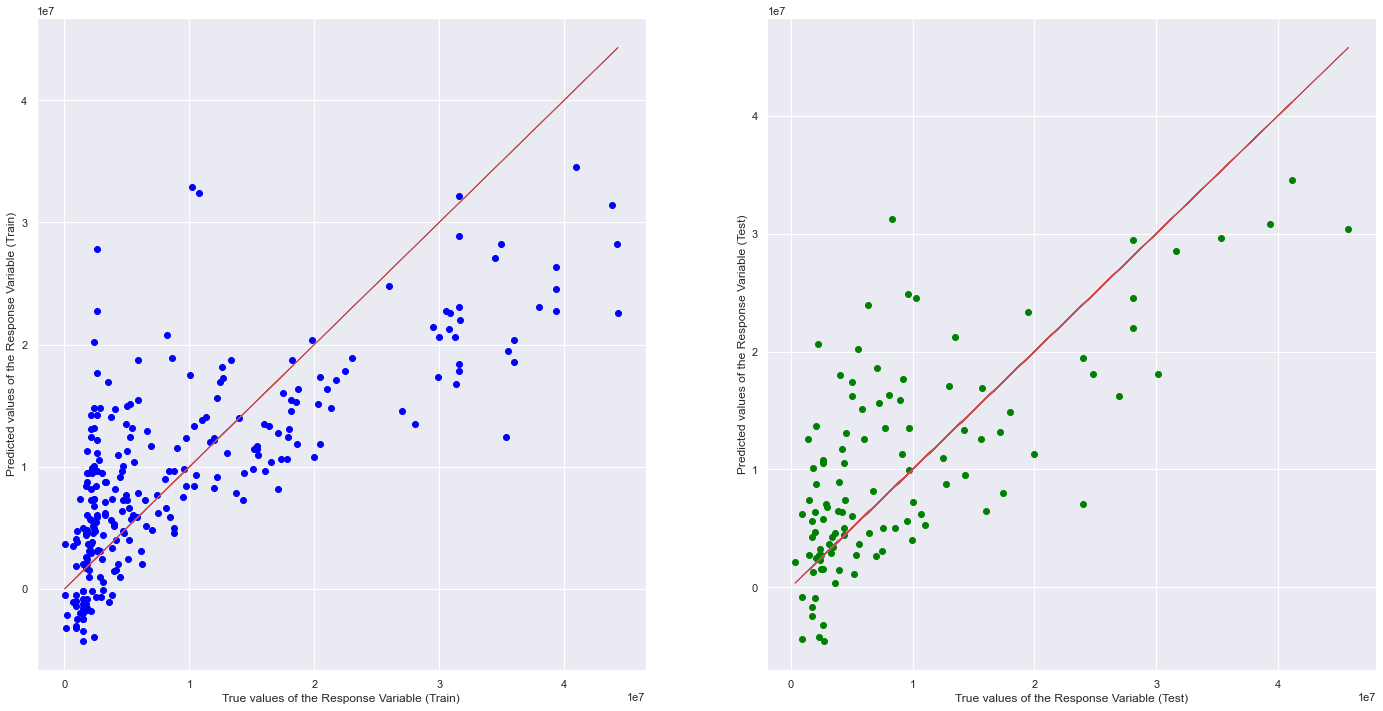

APG
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.3000122307350601
Mean Squared Error (MSE) on Train Set 	: 79062239588343.97
Mean Squared Error (MSE) on Test Set 	: 59739401790250.68


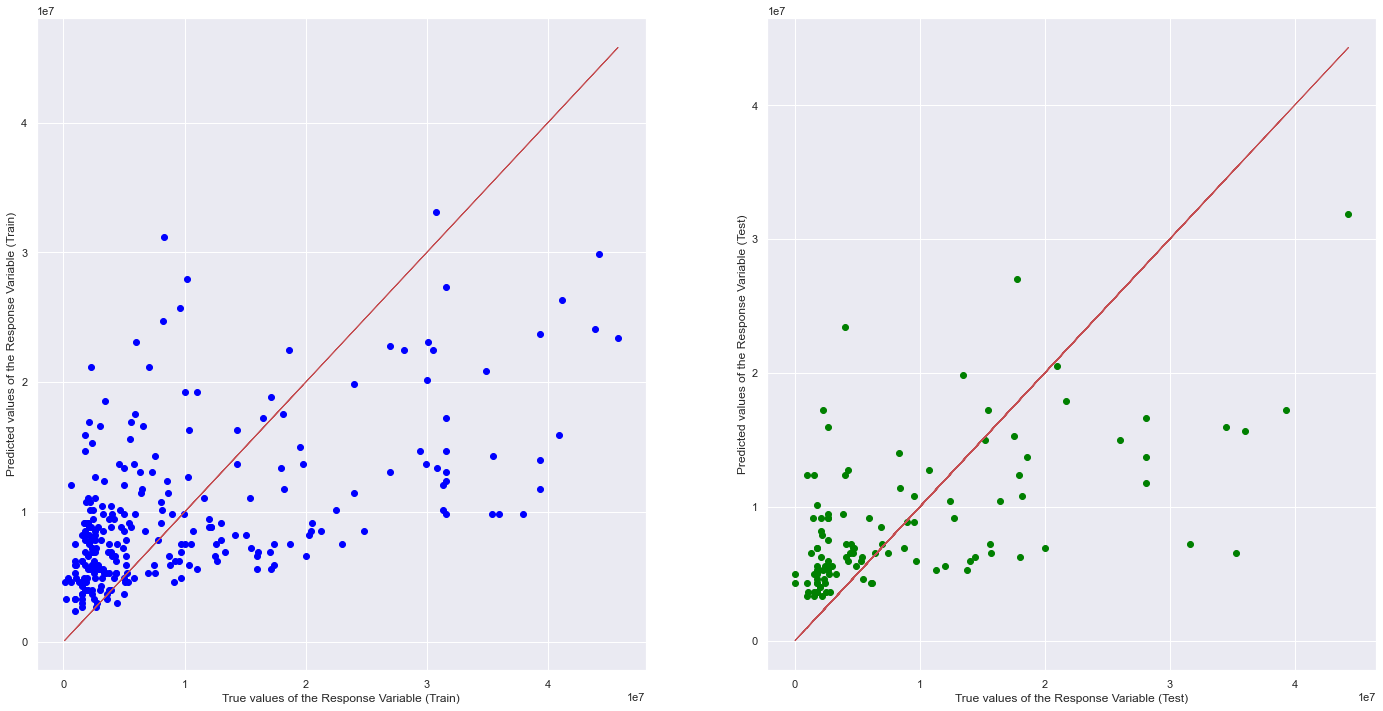

SalaryGrade
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)

Explained Variance (R^2) on Train Set 	: 0.664280575946911
Mean Squared Error (MSE) on Train Set 	: 31760784266431.098
Mean Squared Error (MSE) on Test Set 	: 50202024959385.98


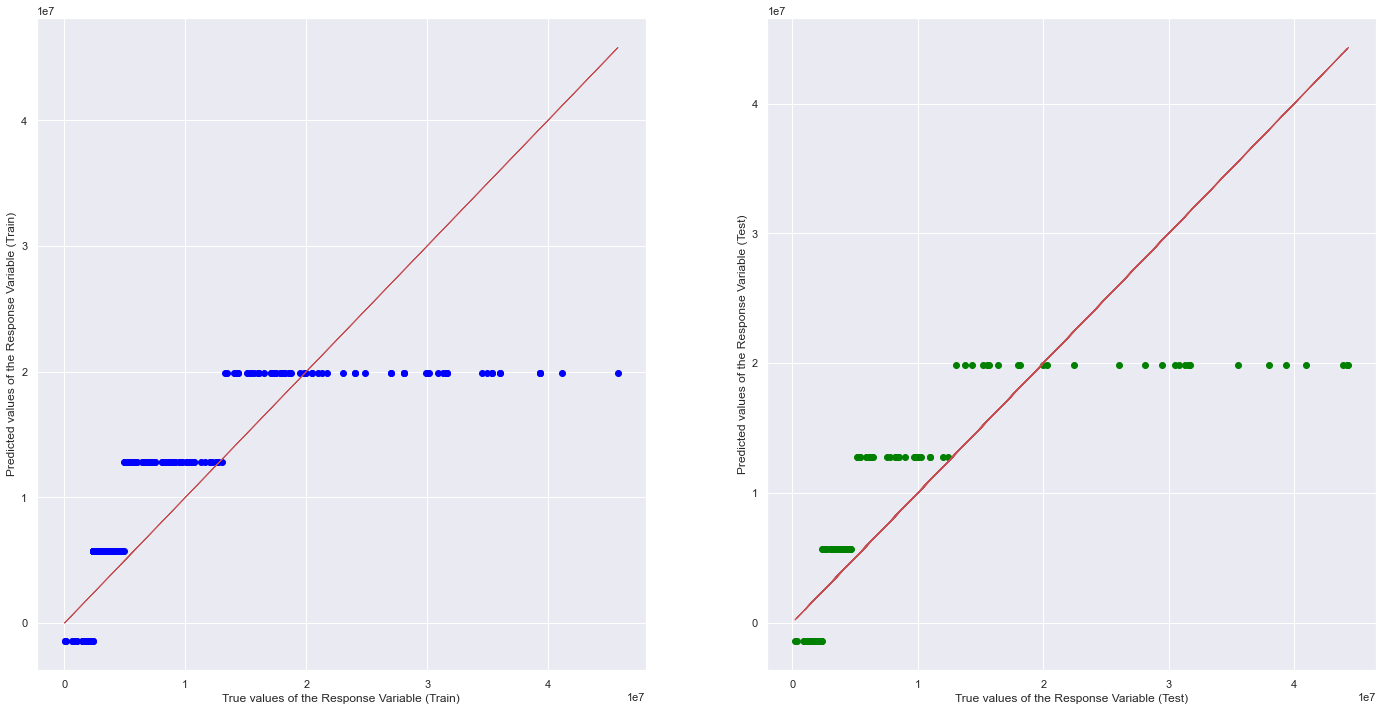

SalaryClass
Train Set : (260, 1) (260, 1)
Test Set  : (112, 1) (112, 1)


ValueError: could not convert string to float: 'B'

In [21]:
#Checking to see if uni-variate linear regression is any better

# Extract Response and Predictors
for var in validSal:
    if(var=='Salary' or var == 'Player'):
        continue
    else:
        print(var)
        y = pd.DataFrame(validSal['Salary'])
        X = pd.DataFrame(validSal[var])

        # Split the Dataset into random Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

        # Check the sample sizes
        print("Train Set :", X_train.shape, y_train.shape)
        print("Test Set  :", X_test.shape, y_test.shape)

        # Create a Linear Regression object
        linreg = LinearRegression()

        # Train the Linear Regression model
        linreg.fit(X_train, y_train)

        # Predict Salary values corresponding to Predictors
        y_train_pred = linreg.predict(X_train)
        y_test_pred = linreg.predict(X_test)

        from sklearn.metrics import mean_squared_error
        print("\nExplained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
        print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
        print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

        # Plot the Predictions vs the True values
        f, axes = plt.subplots(1, 2, figsize=(24, 12))
        axes[0].scatter(y_train, y_train_pred, color = "blue")
        axes[0].plot(y_train, y_train, 'r', linewidth = 1)
        axes[0].set_xlabel("True values of the Response Variable (Train)")
        axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
        axes[1].scatter(y_test, y_test_pred, color = "green")
        axes[1].plot(y_test, y_test, 'r', linewidth = 1)
        axes[1].set_xlabel("True values of the Response Variable (Test)")
        axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
        plt.show()


# Conclusion:
It seems like there aren't any variables that needs to be minimised or eliminated in the equation. Therefore, the Ridge and Lasso regression models have similar Explained Variance and MSE values compared to the simple Linear regression model and a multi-variate regression model is definitely better than a uni-variate regression model. 
***
Since R^2 ≈ 0.6, we can still use these regression models to estimate salaries that Yao Ming and Marcus Paige should expect.
***

***

# Let's try to see if a classifcation machine learning model is able to perform better than a regression model. We will be using Decision Tree and Random Forest classification models.

### We will be creating two categories:
1. SalaryGrade
> - Grade 1 for salaries within the upper quartile of the NBA salary data (top 25%)
> - Grade 2 for salaries within the third quartile of the NBA salary data
> - Grade 3 for salaries within the second quartile of the NBA salary data
> - Grade 4 for salaries within the lower quartile of the NBA salary data (bottom 25%)
2. SalaryClass
> - Class A for salaries: 10,000,000 < S <= 50,000,000 (Currently no player earns 50 million or more)
> - Class B for salaries: 1,000,000 < S <= 10,000,000
> - Class C for salaries, 100,000 < S <= 1,000,000
> - Class A for salaries, S <= 100,000

In [426]:
validSal["SalaryGrade"] = None
validSal["SalaryClass"] = None

#Filling up the SalaryGrades
D = int(validSal['Salary'].quantile(0.25))
C = int(validSal['Salary'].quantile(0.5))
B = int(validSal['Salary'].quantile(0.75))

for i in range(372):
    sal = validSal.iloc[i]
    x = int(sal[1])
    if(x<=D):
        validSal.iat[i, validSal.columns.get_loc('SalaryGrade')] = int(4)
    elif(x<=C):
        validSal.iat[i, validSal.columns.get_loc('SalaryGrade')] = int(3)
    elif(x<=B):
        validSal.iat[i, validSal.columns.get_loc('SalaryGrade')] = int(2)
    elif(x>B):
        validSal.iat[i, validSal.columns.get_loc('SalaryGrade')] = int(1)

for i in validSal['SalaryGrade']:
    k = int(i)
    validSal["SalaryGrade"].replace(i, k, inplace=True)

    
#Filling up the SalaryClass
for i in range(372):
    sal = validSal.iloc[i]
    x = int(sal[1])
    if(x<=100000):
        validSal.iat[i, validSal.columns.get_loc('SalaryClass')] = 'D'
    elif(x<=1000000):
        validSal.iat[i, validSal.columns.get_loc('SalaryClass')] = 'C'
    elif(x<=10000000):
        validSal.iat[i, validSal.columns.get_loc('SalaryClass')] = 'B'
    elif(x<50000000):
        validSal.iat[i, validSal.columns.get_loc('SalaryClass')] = 'A'

validSal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 378
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       372 non-null    object 
 1   Salary       372 non-null    float64
 2   Yrs          372 non-null    float64
 3   G            372 non-null    float64
 4   FG%          372 non-null    float64
 5   3P%          372 non-null    float64
 6   FT%          372 non-null    float64
 7   WS           372 non-null    float64
 8   WS/48        372 non-null    float64
 9   MPG          372 non-null    float64
 10  RPG          372 non-null    float64
 11  PPG          372 non-null    float64
 12  APG          372 non-null    float64
 13  SalaryGrade  372 non-null    int64  
 14  SalaryClass  372 non-null    object 
dtypes: float64(12), int64(1), object(2)
memory usage: 54.6+ KB


C:\Users\TYH\AppData\Local\Temp/ipykernel_2776/4243009821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validSal["SalaryGrade"] = None
C:\Users\TYH\AppData\Local\Temp/ipykernel_2776/4243009821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validSal["SalaryClass"] = None
C:\Users\TYH\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [492]:
#Creating the train and test data for SalaryGrade first

# Extract Response and Predictors
X = validSal[['WS', 'MPG','RPG','PPG', 'APG']]
y = validSal['SalaryGrade']

# Split the Dataset into random Train and Test

X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y, test_size = 0.3)

0.6538461538461539 0.6160714285714286


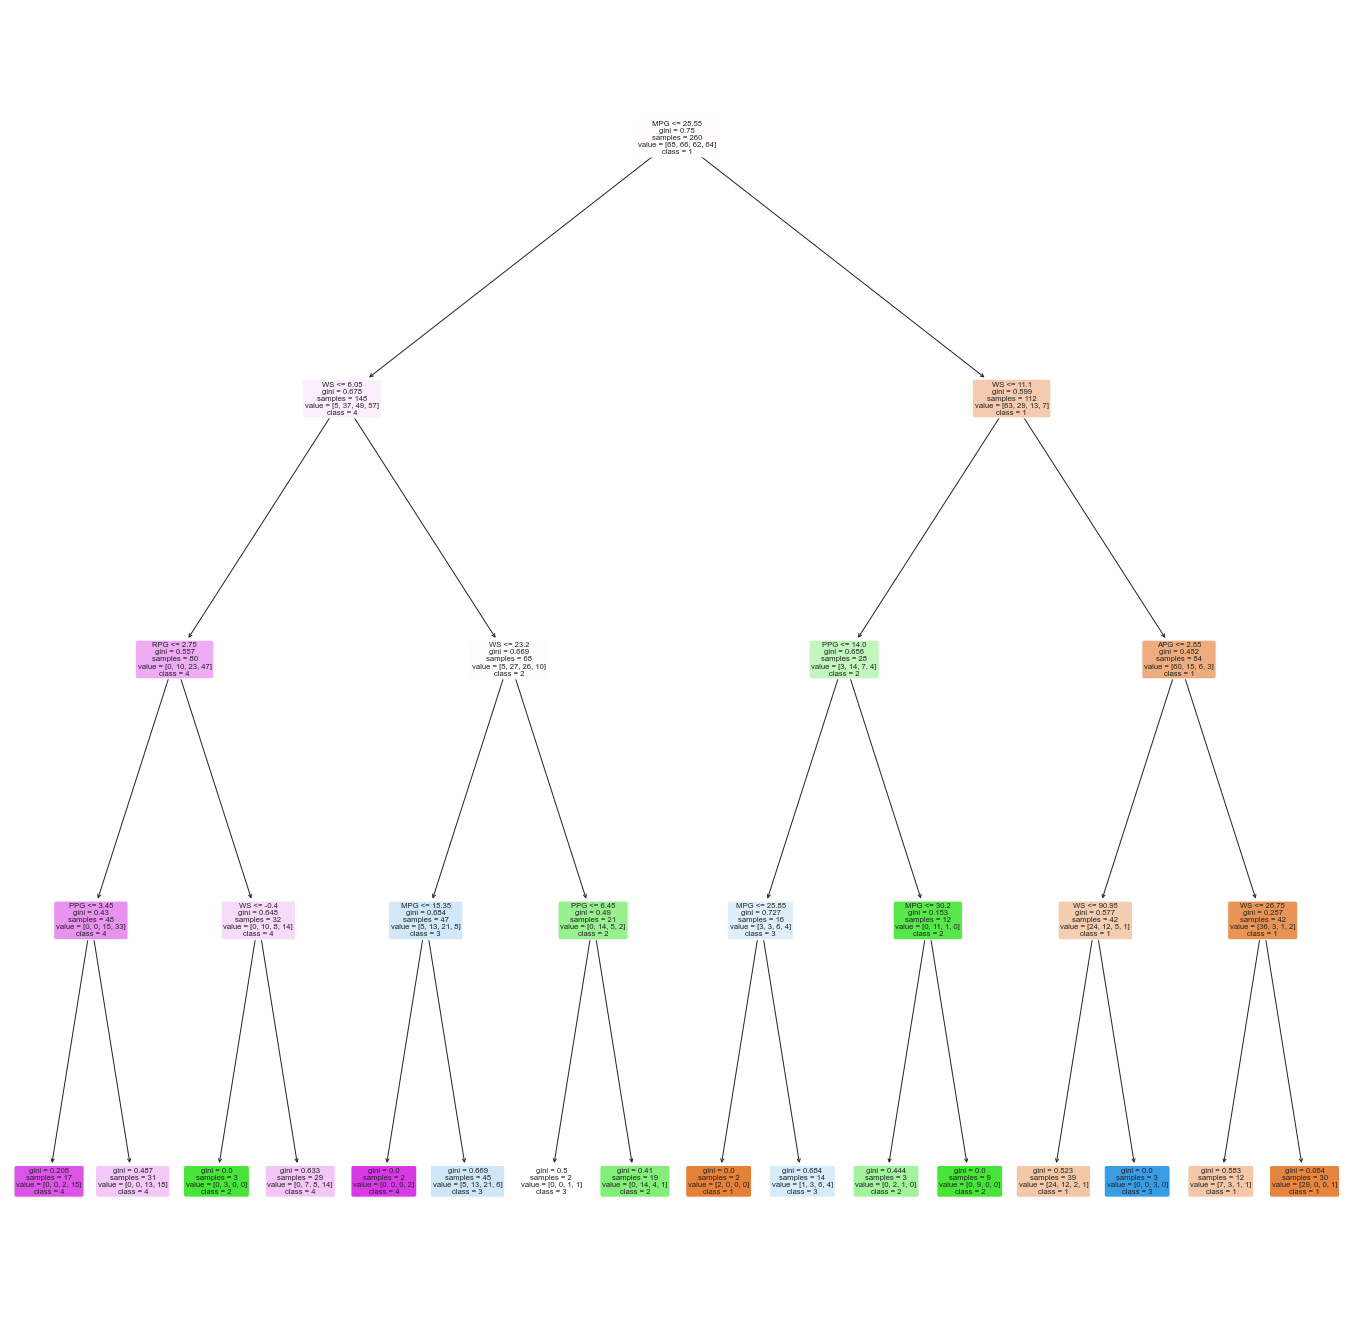

In [493]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
        feature_names=X_train.columns, 
        class_names=['1','2','3','4'])
print(dectree.score(X_train,y_train), dectree.score(X_test, y_test))

In [494]:
from sklearn.metrics import confusion_matrix

Train Data
Accuracy  :	 0.6538461538461539

TPR Train (Grade 1):	 0.9117647058823529
TNR Train (Grade 1):	 0.890625
FPR Train (Grade 1):	 0.109375
FNR Train (Grade 1):	 0.08823529411764706

TPR Train (Grade 2):	 0.42424242424242425
TNR Train (Grade 2):	 0.9690721649484536
FPR Train (Grade 2):	 0.030927835051546393
FNR Train (Grade 2):	 0.5757575757575758

TPR Train (Grade 3):	 0.5
TNR Train (Grade 3):	 0.8333333333333334
FPR Train (Grade 3):	 0.16666666666666666
FNR Train (Grade 3):	 0.5

TPR Train (Grade 4):	 0.765625
TNR Train (Grade 4):	 0.8469387755102041
FPR Train (Grade 4):	 0.15306122448979592
FNR Train (Grade 4):	 0.234375



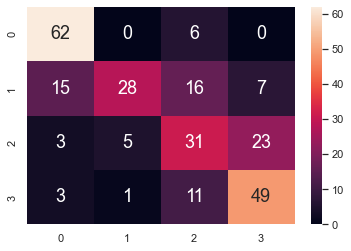

In [495]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Plot the Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)

tpTrain = cmTrain[0][0]
fpTrain = cmTrain[1][0] + cmTrain[2][0] + cmTrain[3][0] 
tnTrain = cmTrain[1][1] + cmTrain[1][2] + cmTrain[1][3] + cmTrain[2][1] + cmTrain[2][2] + cmTrain[2][3] + cmTrain[3][1] + cmTrain[3][2] + cmTrain[3][3]
fnTrain = cmTrain[0][1] + cmTrain[0][2] + cmTrain[0][3] 

print("TPR Train (Grade 1):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Grade 1):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Grade 1):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Grade 1):\t", (fnTrain/(tpTrain + fnTrain)))
print()


tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1] + cmTrain[2][1] + cmTrain[3][1] 
tnTrain = cmTrain[0][0] + cmTrain[0][2] + cmTrain[0][3] + cmTrain[2][0] + cmTrain[2][2] + cmTrain[2][3] + cmTrain[3][0] + cmTrain[3][2] + cmTrain[3][3]
fnTrain = cmTrain[1][0] + cmTrain[1][2] + cmTrain[1][3] 

print("TPR Train (Grade 2):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Grade 2):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Grade 2):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Grade 2):\t", (fnTrain/(tpTrain + fnTrain)))
print()

tpTrain = cmTrain[2][2]
fpTrain = cmTrain[0][2] + cmTrain[1][2] + cmTrain[3][2] 
tnTrain = cmTrain[0][0] + cmTrain[0][1] + cmTrain[0][3] + cmTrain[1][0] + cmTrain[1][1] + cmTrain[1][3] + cmTrain[3][0] + cmTrain[3][1] + cmTrain[3][3]
fnTrain = cmTrain[2][0] + cmTrain[2][1] + cmTrain[2][3] 

print("TPR Train (Grade 3):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Grade 3):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Grade 3):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Grade 3):\t", (fnTrain/(tpTrain + fnTrain)))
print()

tpTrain = cmTrain[3][3]
fpTrain = cmTrain[0][3] + cmTrain[1][3] + cmTrain[2][3] 
tnTrain = cmTrain[0][0] + cmTrain[0][1] + cmTrain[0][2] + cmTrain[1][0] + cmTrain[1][1] + cmTrain[1][2] + cmTrain[2][0] + cmTrain[2][1] + cmTrain[2][2]
fnTrain = cmTrain[3][0] + cmTrain[3][1] + cmTrain[3][2] 

print("TPR Train (Grade 4):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Grade 4):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Grade 4):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Grade 4):\t", (fnTrain/(tpTrain + fnTrain)))
print()

Test Data
Accuracy  :	 0.6160714285714286

TPR Test (Grade 1):	 0.92
TNR Test (Grade 1):	 0.8850574712643678
FPR Test (Grade 1):	 0.11494252873563218
FNR Test (Grade 1):	 0.08

TPR Test (Grade 2):	 0.37037037037037035
TNR Test (Grade 2):	 0.9411764705882353
FPR Test (Grade 2):	 0.058823529411764705
FNR Test (Grade 2):	 0.6296296296296297

TPR Test (Grade 3):	 0.3
TNR Test (Grade 3):	 0.8292682926829268
FPR Test (Grade 3):	 0.17073170731707318
FNR Test (Grade 3):	 0.7

TPR Test (Grade 4):	 0.9
TNR Test (Grade 4):	 0.8292682926829268
FPR Test (Grade 4):	 0.17073170731707318
FNR Test (Grade 4):	 0.1



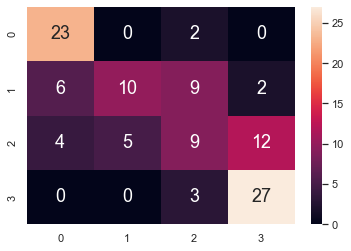

In [496]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)

tpTest = cmTest[0][0]
fpTest = cmTest[1][0] + cmTest[2][0] + cmTest[3][0] 
tnTest = cmTest[1][1] + cmTest[1][2] + cmTest[1][3] + cmTest[2][1] + cmTest[2][2] + cmTest[2][3] + cmTest[3][1] + cmTest[3][2] + cmTest[3][3]
fnTest = cmTest[0][1] + cmTest[0][2] + cmTest[0][3] 

print("TPR Test (Grade 1):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Grade 1):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Grade 1):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Grade 1):\t", (fnTest/(fnTest + tpTest)))
print()


tpTest = cmTest[1][1]
fpTest = cmTest[0][1] + cmTest[2][1] + cmTest[3][1] 
tnTest = cmTest[0][0] + cmTest[0][2] + cmTest[0][3] + cmTest[2][0] + cmTest[2][2] + cmTest[2][3] + cmTest[3][0] + cmTest[3][2] + cmTest[3][3]
fnTest = cmTest[1][0] + cmTest[1][2] + cmTest[1][3] 

print("TPR Test (Grade 2):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Grade 2):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Grade 2):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Grade 2):\t", (fnTest/(fnTest + tpTest)))
print()

tpTest = cmTest[2][2]
fpTest = cmTest[0][2] + cmTest[1][2] + cmTest[3][2] 
tnTest = cmTest[0][0] + cmTest[0][1] + cmTest[0][3] + cmTest[1][0] + cmTest[1][1] + cmTest[1][3] + cmTest[3][0] + cmTest[3][1] + cmTest[3][3]
fnTest = cmTest[2][0] + cmTest[2][1] + cmTest[2][3] 

print("TPR Test (Grade 3):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Grade 3):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Grade 3):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Grade 3):\t", (fnTest/(fnTest + tpTest)))
print()

tpTest = cmTest[3][3]
fpTest = cmTest[0][3] + cmTest[1][3] + cmTest[2][3] 
tnTest = cmTest[0][0] + cmTest[0][1] + cmTest[0][2] + cmTest[1][0] + cmTest[1][1] + cmTest[1][2] + cmTest[2][0] + cmTest[2][1] + cmTest[2][2]
fnTest = cmTest[3][0] + cmTest[3][1] + cmTest[3][2] 

print("TPR Test (Grade 4):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Grade 4):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Grade 4):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Grade 4):\t", (fnTest/(fnTest + tpTest)))
print()

0.7230769230769231 0.6339285714285714


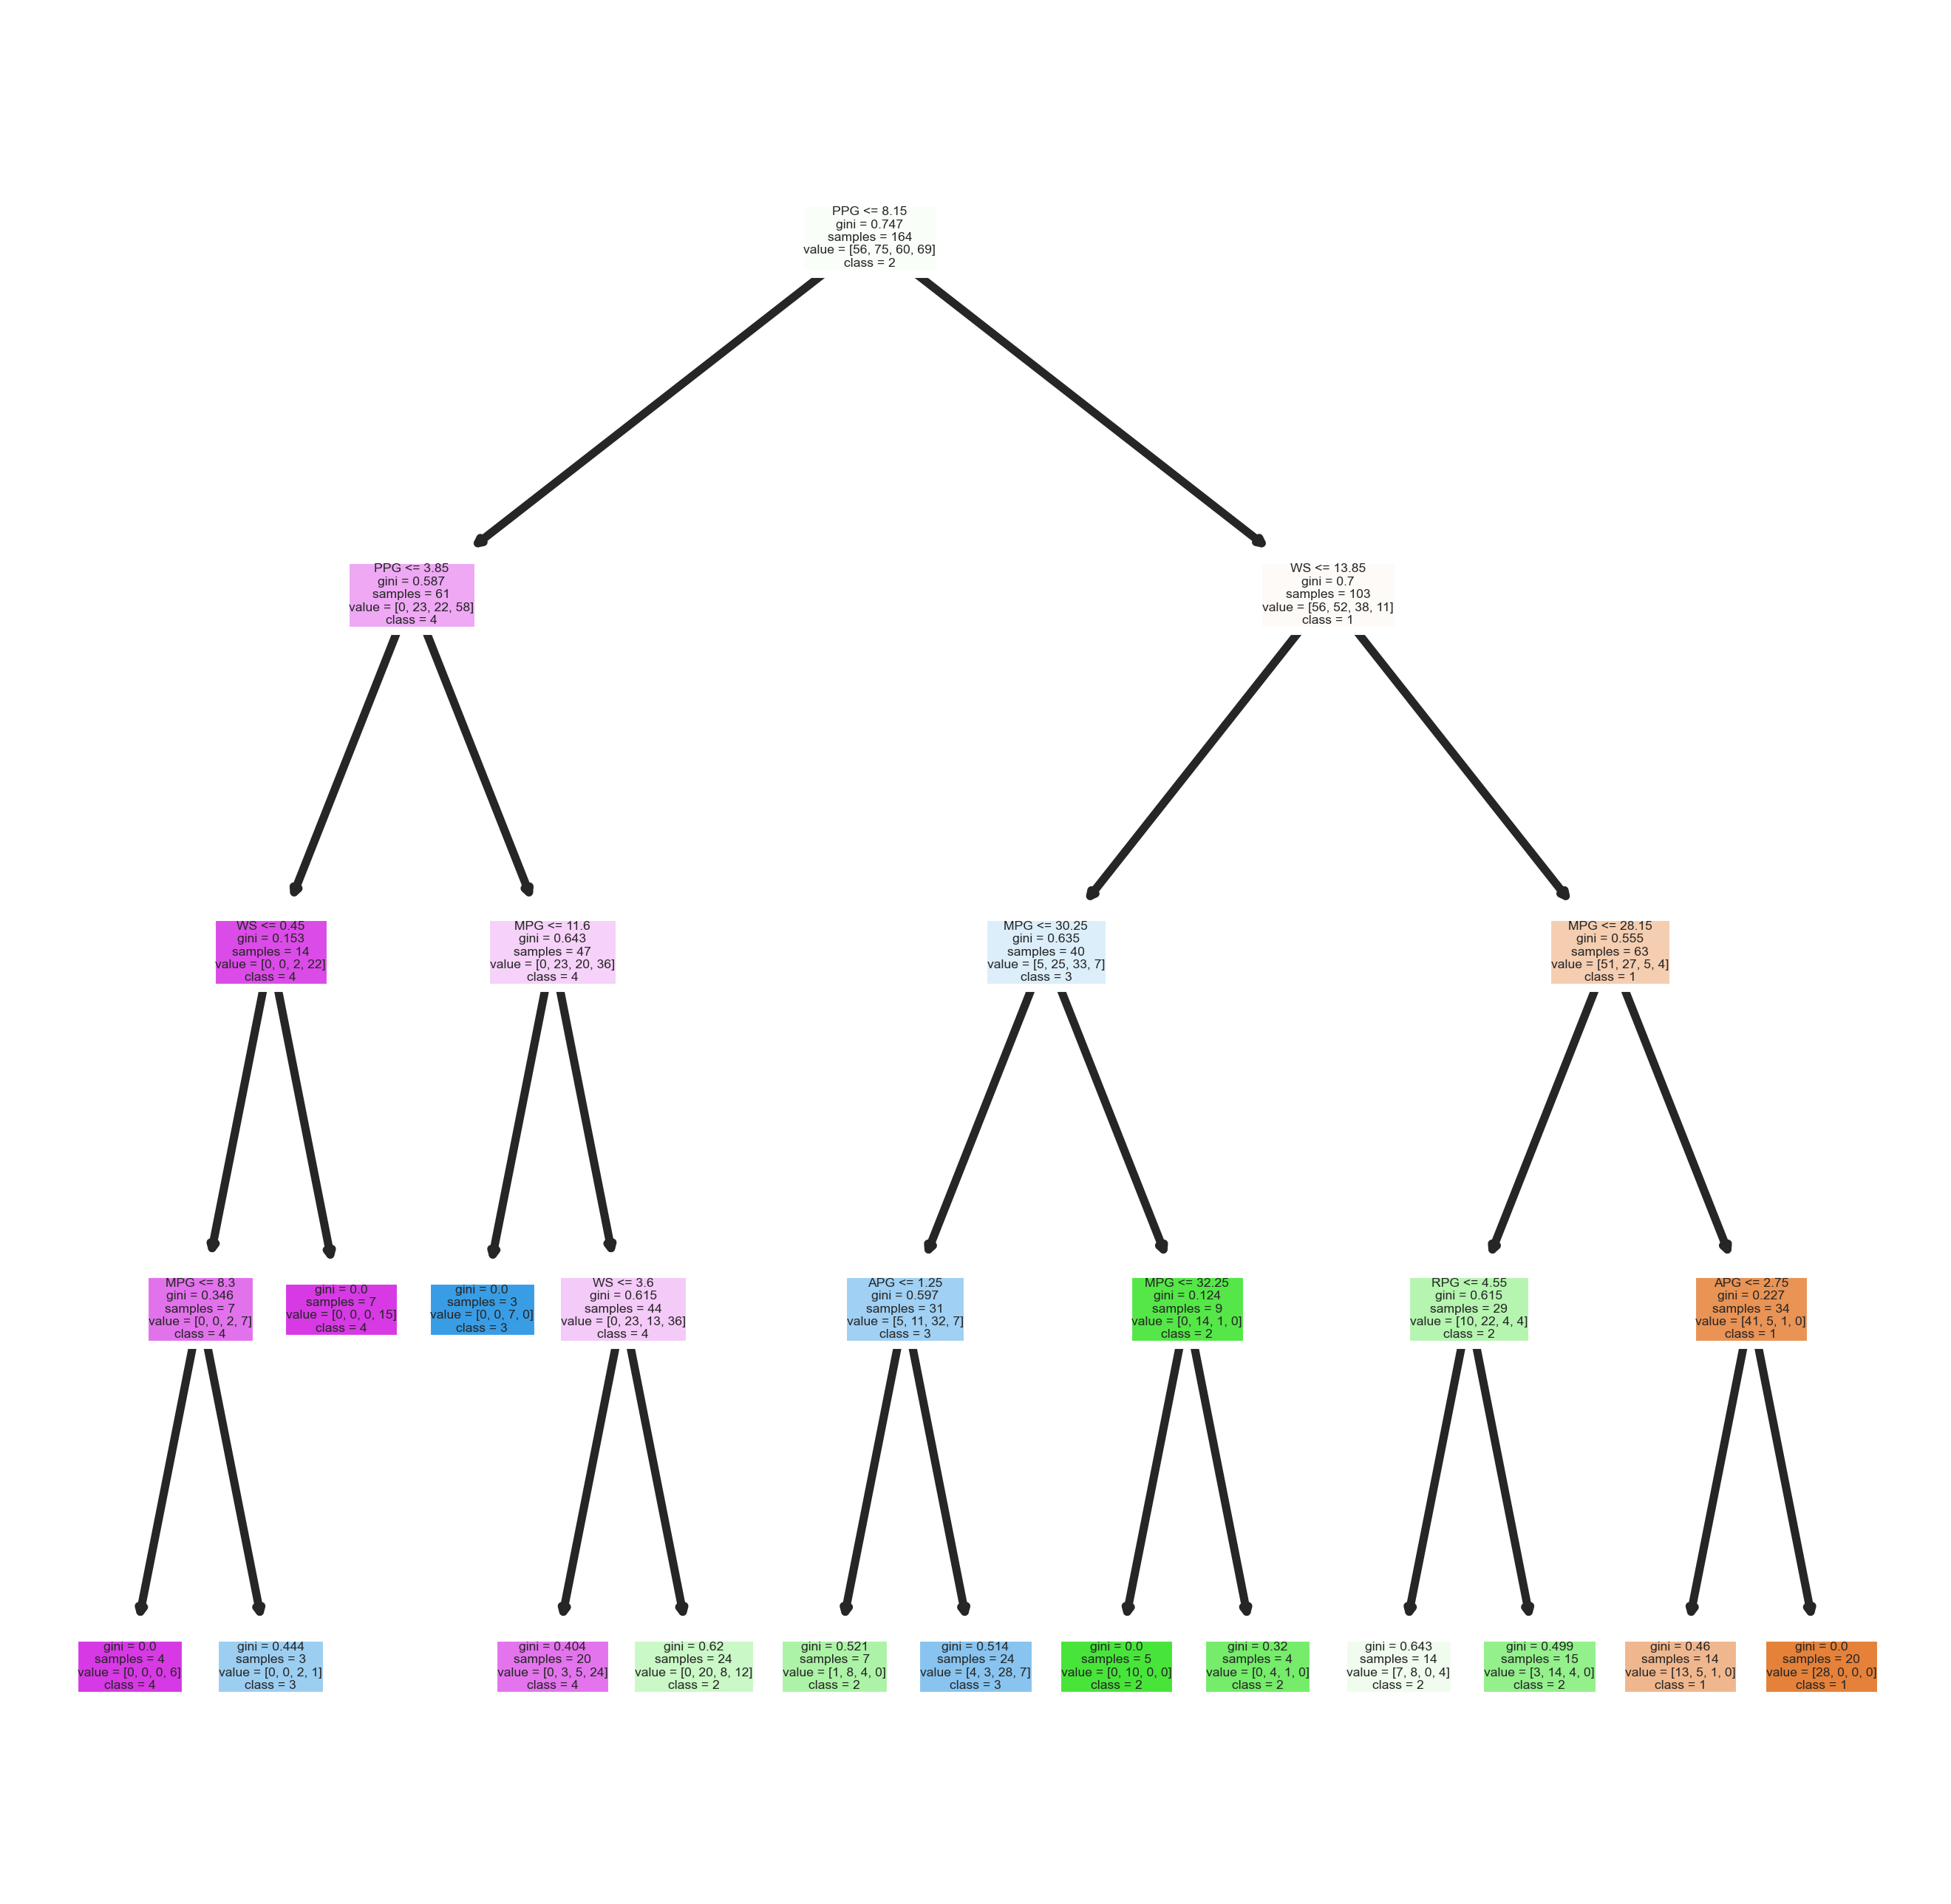

In [497]:
from sklearn.ensemble import RandomForestClassifier
rfg = RandomForestClassifier(max_depth=4, random_state = 97, n_estimators = 100)
rfg.fit(X_train, y_train)

from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfg.estimators_[0], feature_names = X_train.columns, class_names= ["1","2","3","4"], filled = True)

print(rfg.score(X_train,y_train), rfg.score(X_test, y_test))

Train Data
Accuracy  :	 0.7230769230769231

TPR Train (Grade 1):	 0.8970588235294118
TNR Train (Grade 1):	 0.90625
FPR Train (Grade 1):	 0.09375
FNR Train (Grade 1):	 0.10294117647058823

TPR Train (Grade 2):	 0.6818181818181818
TNR Train (Grade 2):	 0.9020618556701031
FPR Train (Grade 2):	 0.0979381443298969
FNR Train (Grade 2):	 0.3181818181818182

TPR Train (Grade 3):	 0.5
TNR Train (Grade 3):	 0.9393939393939394
FPR Train (Grade 3):	 0.06060606060606061
FNR Train (Grade 3):	 0.5

TPR Train (Grade 4):	 0.796875
TNR Train (Grade 4):	 0.8826530612244898
FPR Train (Grade 4):	 0.11734693877551021
FNR Train (Grade 4):	 0.203125



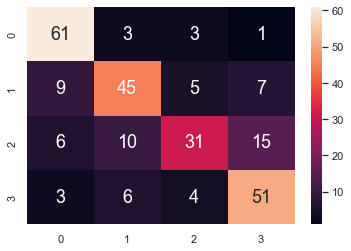

In [498]:
# Predict the Response corresponding to Predictors
y_train_pred = rfg.predict(X_train)

# Plot the Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rfg.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)

tpTrain = cmTrain[0][0]
fpTrain = cmTrain[1][0] + cmTrain[2][0] + cmTrain[3][0] 
tnTrain = cmTrain[1][1] + cmTrain[1][2] + cmTrain[1][3] + cmTrain[2][1] + cmTrain[2][2] + cmTrain[2][3] + cmTrain[3][1] + cmTrain[3][2] + cmTrain[3][3]
fnTrain = cmTrain[0][1] + cmTrain[0][2] + cmTrain[0][3] 

print("TPR Train (Grade 1):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Grade 1):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Grade 1):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Grade 1):\t", (fnTrain/(tpTrain + fnTrain)))
print()


tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1] + cmTrain[2][1] + cmTrain[3][1] 
tnTrain = cmTrain[0][0] + cmTrain[0][2] + cmTrain[0][3] + cmTrain[2][0] + cmTrain[2][2] + cmTrain[2][3] + cmTrain[3][0] + cmTrain[3][2] + cmTrain[3][3]
fnTrain = cmTrain[1][0] + cmTrain[1][2] + cmTrain[1][3] 

print("TPR Train (Grade 2):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Grade 2):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Grade 2):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Grade 2):\t", (fnTrain/(tpTrain + fnTrain)))
print()

tpTrain = cmTrain[2][2]
fpTrain = cmTrain[0][2] + cmTrain[1][2] + cmTrain[3][2] 
tnTrain = cmTrain[0][0] + cmTrain[0][1] + cmTrain[0][3] + cmTrain[1][0] + cmTrain[1][1] + cmTrain[1][3] + cmTrain[3][0] + cmTrain[3][1] + cmTrain[3][3]
fnTrain = cmTrain[2][0] + cmTrain[2][1] + cmTrain[2][3] 

print("TPR Train (Grade 3):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Grade 3):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Grade 3):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Grade 3):\t", (fnTrain/(tpTrain + fnTrain)))
print()

tpTrain = cmTrain[3][3]
fpTrain = cmTrain[0][3] + cmTrain[1][3] + cmTrain[2][3] 
tnTrain = cmTrain[0][0] + cmTrain[0][1] + cmTrain[0][2] + cmTrain[1][0] + cmTrain[1][1] + cmTrain[1][2] + cmTrain[2][0] + cmTrain[2][1] + cmTrain[2][2]
fnTrain = cmTrain[3][0] + cmTrain[3][1] + cmTrain[3][2] 

print("TPR Train (Grade 4):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Grade 4):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Grade 4):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Grade 4):\t", (fnTrain/(tpTrain + fnTrain)))
print()

Test Data
Accuracy  :	 0.6339285714285714

TPR Test (Grade 1):	 0.96
TNR Test (Grade 1):	 0.8620689655172413
FPR Test (Grade 1):	 0.13793103448275862
FNR Test (Grade 1):	 0.04

TPR Test (Grade 2):	 0.5555555555555556
TNR Test (Grade 2):	 0.8588235294117647
FPR Test (Grade 2):	 0.1411764705882353
FNR Test (Grade 2):	 0.4444444444444444

TPR Test (Grade 3):	 0.26666666666666666
TNR Test (Grade 3):	 0.9512195121951219
FPR Test (Grade 3):	 0.04878048780487805
FNR Test (Grade 3):	 0.7333333333333333

TPR Test (Grade 4):	 0.8
TNR Test (Grade 4):	 0.8414634146341463
FPR Test (Grade 4):	 0.15853658536585366
FNR Test (Grade 4):	 0.2



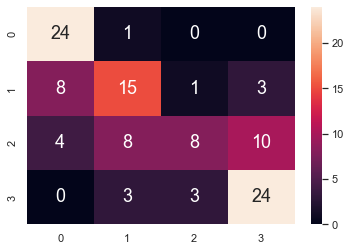

In [499]:
# Predict the Response corresponding to Predictors
y_test_pred = rfg.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfg.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)

tpTest = cmTest[0][0]
fpTest = cmTest[1][0] + cmTest[2][0] + cmTest[3][0] 
tnTest = cmTest[1][1] + cmTest[1][2] + cmTest[1][3] + cmTest[2][1] + cmTest[2][2] + cmTest[2][3] + cmTest[3][1] + cmTest[3][2] + cmTest[3][3]
fnTest = cmTest[0][1] + cmTest[0][2] + cmTest[0][3] 

print("TPR Test (Grade 1):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Grade 1):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Grade 1):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Grade 1):\t", (fnTest/(fnTest + tpTest)))
print()


tpTest = cmTest[1][1]
fpTest = cmTest[0][1] + cmTest[2][1] + cmTest[3][1] 
tnTest = cmTest[0][0] + cmTest[0][2] + cmTest[0][3] + cmTest[2][0] + cmTest[2][2] + cmTest[2][3] + cmTest[3][0] + cmTest[3][2] + cmTest[3][3]
fnTest = cmTest[1][0] + cmTest[1][2] + cmTest[1][3] 

print("TPR Test (Grade 2):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Grade 2):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Grade 2):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Grade 2):\t", (fnTest/(fnTest + tpTest)))
print()

tpTest = cmTest[2][2]
fpTest = cmTest[0][2] + cmTest[1][2] + cmTest[3][2] 
tnTest = cmTest[0][0] + cmTest[0][1] + cmTest[0][3] + cmTest[1][0] + cmTest[1][1] + cmTest[1][3] + cmTest[3][0] + cmTest[3][1] + cmTest[3][3]
fnTest = cmTest[2][0] + cmTest[2][1] + cmTest[2][3] 

print("TPR Test (Grade 3):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Grade 3):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Grade 3):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Grade 3):\t", (fnTest/(fnTest + tpTest)))
print()

tpTest = cmTest[3][3]
fpTest = cmTest[0][3] + cmTest[1][3] + cmTest[2][3] 
tnTest = cmTest[0][0] + cmTest[0][1] + cmTest[0][2] + cmTest[1][0] + cmTest[1][1] + cmTest[1][2] + cmTest[2][0] + cmTest[2][1] + cmTest[2][2]
fnTest = cmTest[3][0] + cmTest[3][1] + cmTest[3][2] 

print("TPR Test (Grade 4):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Grade 4):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Grade 4):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Grade 4):\t", (fnTest/(fnTest + tpTest)))
print()

# What have we learned so far?
It seems like the Decision Tree model has an accuracy of more than 0.6 for both train and test datasets when predicting a player's SalaryGrade and a Random Forest model has a greater accuracy than the Decision Tree. We have chosen to use trees of max depth = 4 as it provides the most optimal performance, any lower or higher will result in lower performance.
This will be useful in helping us to determine the range of salary that Yao Ming and Marcus Paige should be expecting based on their performance in the NBA.


0.8538461538461538 0.8214285714285714


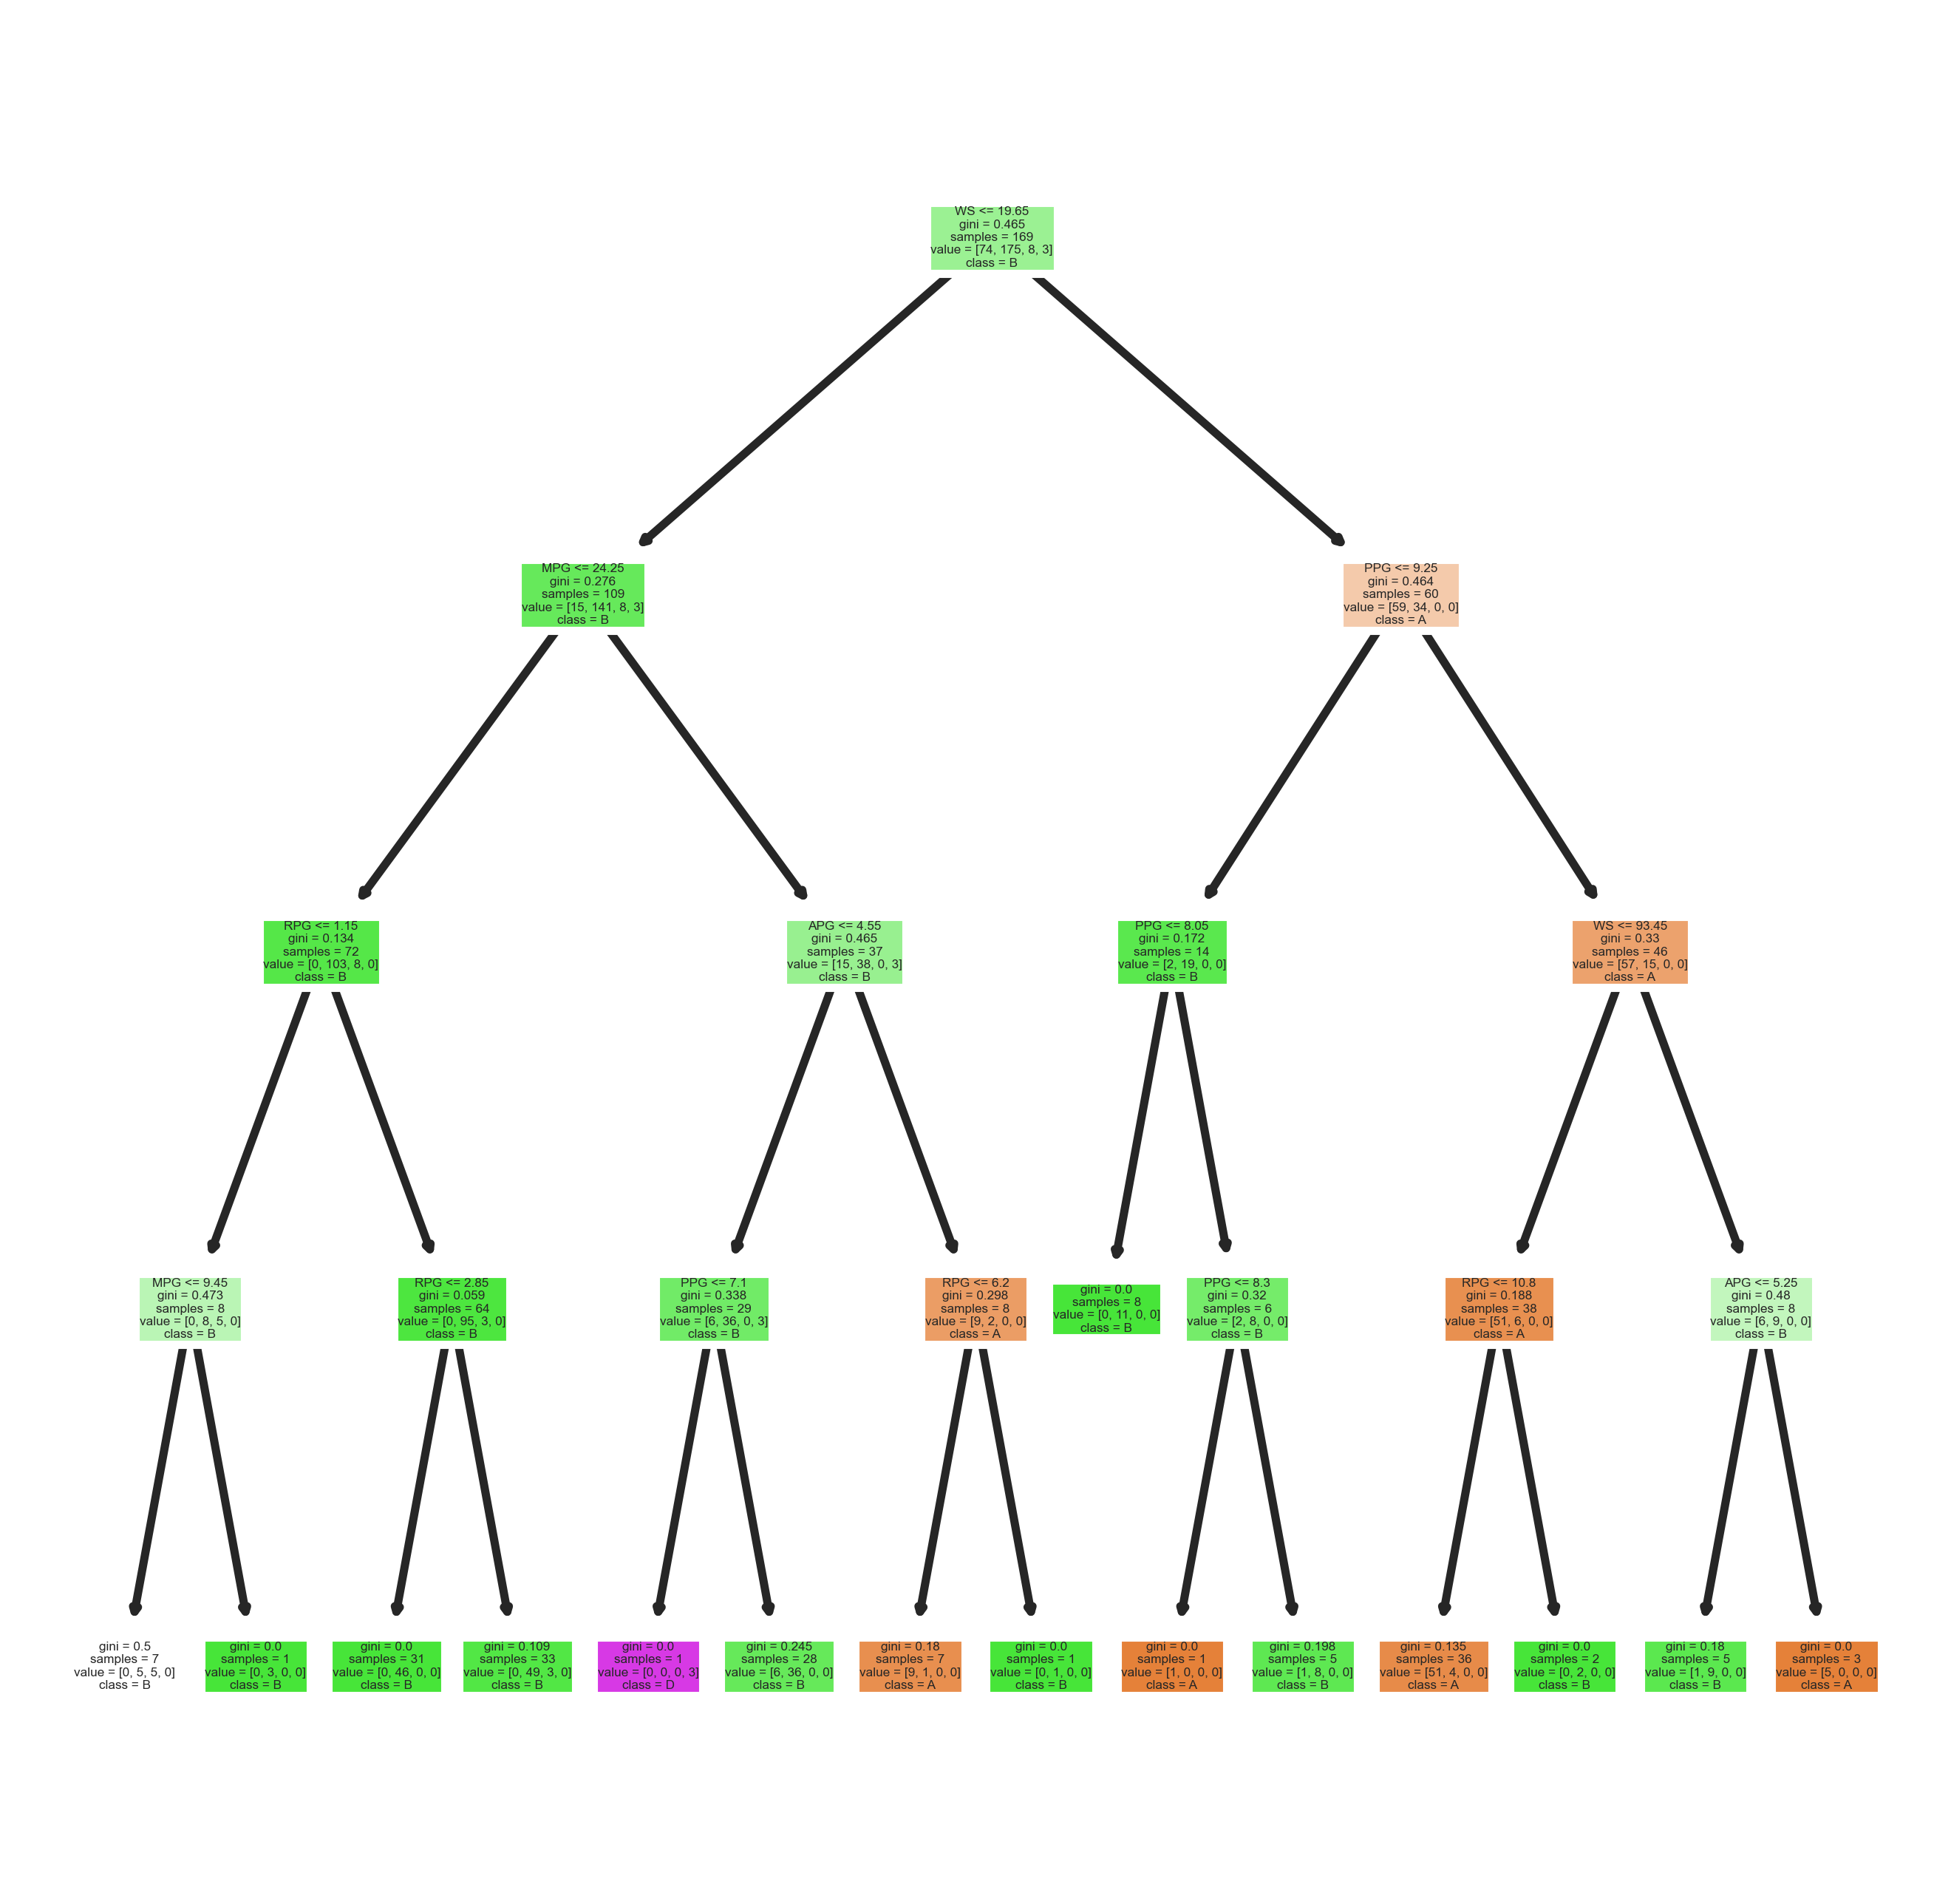

In [503]:
#Creating the train and test dataset for SalaryClass and train using a Random Forest model

# Extract Response and Predictors
X = validSal[['WS', 'MPG','RPG','PPG', 'APG']]
y = validSal['SalaryClass']

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rfs = RandomForestClassifier(max_depth=4, random_state = 21, n_estimators = 100) #Max depth 4 as well
rfs.fit(X_train, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfs.estimators_[0], feature_names = X_train.columns, class_names= ["A","B","C","D"], filled = True)

print(rfs.score(X_train,y_train), rfs.score(X_test, y_test))

Train Data
Accuracy  :	 0.8538461538461538

TPR Train (Class A):	 0.8108108108108109
TNR Train (Class A):	 0.9247311827956989
FPR Train (Class A):	 0.07526881720430108
FNR Train (Class A):	 0.1891891891891892

TPR Train (Class B):	 0.9190751445086706
TNR Train (Class B):	 0.7241379310344828
FPR Train (Class B):	 0.27586206896551724
FNR Train (Class B):	 0.08092485549132948

TPR Train (Class C):	 0.2727272727272727
TNR Train (Class C):	 1.0
FPR Train (Class C):	 0.0
FNR Train (Class C):	 0.7272727272727273

TPR Train (Class D):	 0.0
TNR Train (Class D):	 1.0
FPR Train (Class D):	 0.0
FNR Train (Class D):	 1.0



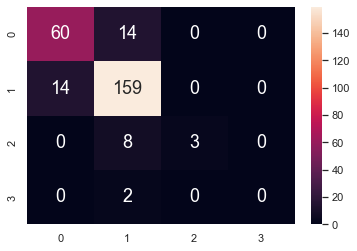

In [504]:
# Predict the Response corresponding to Predictors
y_train_pred = rfs.predict(X_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rfs.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)

tpTrain = cmTrain[0][0]
fpTrain = cmTrain[1][0] + cmTrain[2][0] + cmTrain[3][0] 
tnTrain = cmTrain[1][1] + cmTrain[1][2] + cmTrain[1][3] + cmTrain[2][1] + cmTrain[2][2] + cmTrain[2][3] + cmTrain[3][1] + cmTrain[3][2] + cmTrain[3][3]
fnTrain = cmTrain[0][1] + cmTrain[0][2] + cmTrain[0][3] 

print("TPR Train (Class A):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Class A):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Class A):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Class A):\t", (fnTrain/(tpTrain + fnTrain)))
print()


tpTrain = cmTrain[1][1]
fpTrain = cmTrain[0][1] + cmTrain[2][1] + cmTrain[3][1] 
tnTrain = cmTrain[0][0] + cmTrain[0][2] + cmTrain[0][3] + cmTrain[2][0] + cmTrain[2][2] + cmTrain[2][3] + cmTrain[3][0] + cmTrain[3][2] + cmTrain[3][3]
fnTrain = cmTrain[1][0] + cmTrain[1][2] + cmTrain[1][3] 

print("TPR Train (Class B):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Class B):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Class B):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Class B):\t", (fnTrain/(tpTrain + fnTrain)))
print()

tpTrain = cmTrain[2][2]
fpTrain = cmTrain[0][2] + cmTrain[1][2] + cmTrain[3][2] 
tnTrain = cmTrain[0][0] + cmTrain[0][1] + cmTrain[0][3] + cmTrain[1][0] + cmTrain[1][1] + cmTrain[1][3] + cmTrain[3][0] + cmTrain[3][1] + cmTrain[3][3]
fnTrain = cmTrain[2][0] + cmTrain[2][1] + cmTrain[2][3] 

print("TPR Train (Class C):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Class C):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Class C):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Class C):\t", (fnTrain/(tpTrain + fnTrain)))
print()
tpTrain = cmTrain[3][3]
fpTrain = cmTrain[0][3] + cmTrain[1][3] + cmTrain[2][3] 
tnTrain = cmTrain[0][0] + cmTrain[0][1] + cmTrain[0][2] + cmTrain[1][0] + cmTrain[1][1] + cmTrain[1][2] + cmTrain[2][0] + cmTrain[2][1] + cmTrain[2][2]
fnTrain = cmTrain[3][0] + cmTrain[3][1] + cmTrain[3][2] 

print("TPR Train (Class D):\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train (Class D):\t", (tnTrain/(tnTrain + fpTrain)))
print("FPR Train (Class D):\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train (Class D):\t", (fnTrain/(tpTrain + fnTrain)))
print()

Test Data
Accuracy  :	 0.8214285714285714

TPR Test (Class A):	 0.8571428571428571
TNR Test (Class A):	 0.8857142857142857
FPR Test (Class A):	 0.11428571428571428
FNR Test (Class A):	 0.14285714285714285

TPR Test (Class B):	 0.875
TNR Test (Class B):	 0.7708333333333334
FPR Test (Class B):	 0.22916666666666666
FNR Test (Class B):	 0.125

TPR Test (Class C):	 0.0
TNR Test (Class C):	 0.9906542056074766
FPR Test (Class C):	 0.009345794392523364
FNR Test (Class C):	 1.0

TPR Test (Class D):	 0.0
TNR Test (Class D):	 1.0
FPR Test (Class D):	 0.0
FNR Test (Class D):	 1.0



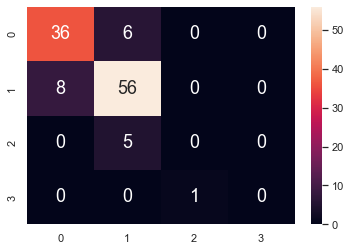

In [505]:
# Predict the Response corresponding to Predictors
y_test_pred = rfs.predict(X_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rfs.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)

tpTest = cmTest[0][0]
fpTest = cmTest[1][0] + cmTest[2][0] + cmTest[3][0] 
tnTest = cmTest[1][1] + cmTest[1][2] + cmTest[1][3] + cmTest[2][1] + cmTest[2][2] + cmTest[2][3] + cmTest[3][1] + cmTest[3][2] + cmTest[3][3]
fnTest = cmTest[0][1] + cmTest[0][2] + cmTest[0][3] 

print("TPR Test (Class A):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Class A):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Class A):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Class A):\t", (fnTest/(fnTest + tpTest)))
print()


tpTest = cmTest[1][1]
fpTest = cmTest[0][1] + cmTest[2][1] + cmTest[3][1] 
tnTest = cmTest[0][0] + cmTest[0][2] + cmTest[0][3] + cmTest[2][0] + cmTest[2][2] + cmTest[2][3] + cmTest[3][0] + cmTest[3][2] + cmTest[3][3]
fnTest = cmTest[1][0] + cmTest[1][2] + cmTest[1][3] 

print("TPR Test (Class B):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Class B):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Class B):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Class B):\t", (fnTest/(fnTest + tpTest)))
print()

tpTest = cmTest[2][2]
fpTest = cmTest[0][2] + cmTest[1][2] + cmTest[3][2] 
tnTest = cmTest[0][0] + cmTest[0][1] + cmTest[0][3] + cmTest[1][0] + cmTest[1][1] + cmTest[1][3] + cmTest[3][0] + cmTest[3][1] + cmTest[3][3]
fnTest = cmTest[2][0] + cmTest[2][1] + cmTest[2][3] 

print("TPR Test (Class C):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Class C):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Class C):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Class C):\t", (fnTest/(fnTest + tpTest)))
print()

tpTest = cmTest[3][3]
fpTest = cmTest[0][3] + cmTest[1][3] + cmTest[2][3] 
tnTest = cmTest[0][0] + cmTest[0][1] + cmTest[0][2] + cmTest[1][0] + cmTest[1][1] + cmTest[1][2] + cmTest[2][0] + cmTest[2][1] + cmTest[2][2]
fnTest = cmTest[3][0] + cmTest[3][1] + cmTest[3][2] 

print("TPR Test (Class D):\t", (tpTest/(tpTest + fnTest)))
print("TNR Test (Class D):\t", (tnTest/(tnTest + fpTest)))
print("FPR Test (Class D):\t", (fpTest/(fpTest + tnTest)))
print("FNR Test (Class D):\t", (fnTest/(fnTest + tpTest)))
print()

# Conclusion:
The SalaryClass is a better variable to use when predicting the salary range that an NBA should expect as the accuracy on the train and test dataset is more than 0.8. Therefore, we will be using the Lasso regression model to predict what kind of salary Yao Ming and Marcus Paige should expect and what range of salary would align with their individual player's performance in the NBA using the SalaryGrade and SalaryClass.

The reason for using both Grade and Class is to provide a tighter salary range for the players in their decision making since both Grade and Class represent different ranges of salary. 

In [506]:
#Finding out Yao Ming's expected salary and range
YaoMing = draftdata.iloc[[674]]

print("Yao Ming's expected salary should be around:", int(lasso.predict(YaoMing[["WS","MPG","RPG","PPG","APG"]])))
print("Yao Ming's salary Grade is:", str(rfg.predict(YaoMing[["WS","MPG","RPG","PPG","APG"]])), " | He should be getting a salary of more than", B)
print("Yao Ming's salary Class is:", rfs.predict(YaoMing[["WS","MPG","RPG","PPG","APG"]]), " | He should be getting a salary of between 10 million to 50 million")

Yao Ming's expected salary should be around: 20482294
Yao Ming's salary Grade is: [1]  | He should be getting a salary of more than 13009715
Yao Ming's salary Class is: ['A']  | He should be getting a salary of between 10 million to 50 million


In [507]:
#Finding out Marcus Paige's expected salary and range
MarcPaige = draftdata.iloc[[1562]] 

print("Marcus Paige's expected salary should be around:", int(lasso.predict(MarcPaige[["WS","MPG","RPG","PPG","APG"]])))
print("Marcus Paige's salary Grade is:",str(rfg.predict(MarcPaige[["WS","MPG","RPG","PPG","APG"]])), " | He should be getting a salary of less than or equals to", D)
print("Marcus Paige's salary class is:", rfs.predict(MarcPaige[["WS","MPG","RPG","PPG","APG"]]), "| He should be getting a salary of between 100,000 to 1 million")

Marcus Paige's expected salary should be around: 1031201
Marcus Paige's salary Grade is: [4]  | He should be getting a salary of less than or equals to 2353320
Marcus Paige's salary class is: ['C'] | He should be getting a salary of between 100,000 to 1 million
